In [464]:
def plot_color_lines(traj, label, ax, cmp):
    
    if isinstance(label, int):
        ax.plot(traj[:,0], traj[:,1], c = cmp(label))
    else:
        CPs = [0] + np.argwhere(label[1:] != label[:-1]).flatten().tolist() + [250]

        for i, o in zip(CPs[:-1], CPs[1:]):
            lab_cp = np.round(label[i:o].mean())
            if lab_cp == 0: zorder = 1
            else: zorder = -1
            
            ax.plot(traj[i:o+1, 0], traj[i:o+1, 1], c = cmp(lab_cp), zorder = zorder)
                

# Challenge Scheme

In [584]:
import numpy as np
import matplotlib.pyplot as plt
from andi_datasets.models_phenom import models_phenom


In [816]:
Nc = 15; r = 1; L = 20
Ds = [[1,0], [0.1,0.1]]
r , L, Nc = (15, 256, 60)
comp_center = models_phenom._distribute_circular_compartments(Nc = Nc, r = r, L = L)
trajs, labels = models_phenom().confinement(N = 250, T = 100, L = L, comp_center = comp_center, trans = 0.2, Ds = Ds, r = r)

c:\users\gorka\github\andi_datasets\andi_datasets\models_phenom.py:609: UserWarning: Could accomodate 46 circles of the 60 requested. Increase size of environment or decrease radius of compartments.
  warnings.warn(warn_str)


In [817]:
from andi_datasets.utils_trajectories import inside_fov_dataset
fov_origin = [70,70]; fov_length = L*0.3
trajs_fov, labels_fov = inside_fov_dataset(trajs, labels, fov_origin, fov_length)

c:\users\gorka\github\andi_datasets\andi_datasets\utils_trajectories.py:279: RuntimeWarning: All-NaN slice encountered
  merge_dims = np.nanmin(np.vstack((x, y)), axis = 0)


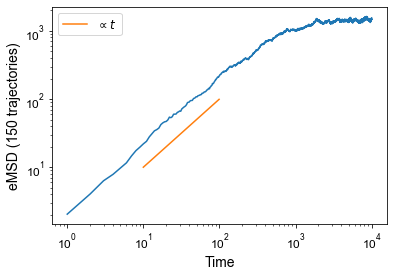

In [655]:
tmsd = (trajs-np.expand_dims(trajs[0,:,:], 0))**2
plt.loglog(np.arange(1, trajs.shape[0]), tmsd[1:,:,0].mean(1))

plt.xlabel('Time')
plt.ylabel('eMSD (150 trajectories)')
plt.plot(np.arange(10, 100), np.arange(10, 100), label = r'$\propto t$')
plt.legend()

<ipython-input-464-a3e0fd5ed3a5>:9: RuntimeWarning: Mean of empty slice.
  lab_cp = np.round(label[i:o].mean())
C:\Users\Gorka\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-464-a3e0fd5ed3a5>:9: RuntimeWarning: Mean of empty slice.
  lab_cp = np.round(label[i:o].mean())
C:\Users\Gorka\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


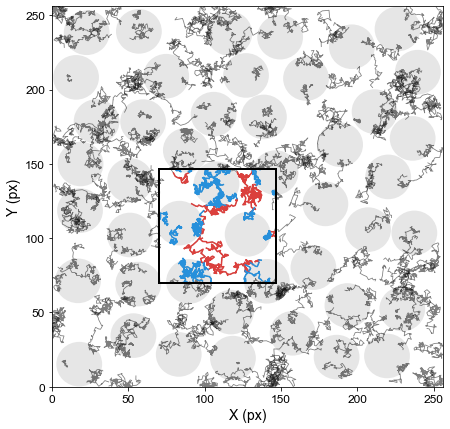

In [822]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.patches import Rectangle
import matplotlib.colors as clr

cmap = clr.LinearSegmentedColormap.from_list('custom blue', ['#2790DB','#DB403D'], N=256)

fig, ax = plt.subplots(figsize = (7,7))

colors = cmap(np.linspace(0, 1, len(trajs_fov)))


for idx, og_traj in enumerate(trajs[:, :, :].transpose(1,0,2)):
    ax.plot(og_traj[:, 0], og_traj[:, 1], c = 'k', alpha = 0.5, lw = 0.8, zorder = -2)

for t, l, c in zip(trajs_fov, labels_fov, colors[::-1, :]):
    plot_color_lines(t.transpose(), label = l[-1]-1, ax = ax, cmp = cmap)
#     c = matplotlib.colors.rgb_to_hsv(c[:-1])
#     c[1] *= 1
#     c = matplotlib.colors.hsv_to_rgb(c)
#     ax.plot(t[0], t[1], c= c)
    
for c in comp_center:
        circle = plt.Circle((c[0], c[1]), r, lw = 0, facecolor = np.ones(3)*0.9, edgecolor = 'k', zorder = -2, alpha = 1)
        ax.add_patch(circle) 


# FOV
fov_min_x, fov_min_y = fov_origin
fov_max_x, fov_max_y = np.array(fov_origin)+fov_length
currentAxis = plt.gca()
currentAxis.add_patch(Rectangle((fov_min_x, fov_min_y), fov_length, fov_length, fill=None, alpha=1, lw = 2, label = 'FOV', zorder = 10))

# plt.plot([fov_])
# ax.axhline(fov_min_x,  c = 'k', label = 'FOV')
# ax.axhline(fov_min_y,  c = 'k')
# ax.axvline(fov_min_x,  c = 'k')
# ax.axvline(fov_min_y,  c = 'k')

# Boundary
# ax.axhline(0,  alpha = 0.5, ls = '--', c = 'k', label = 'boundary')
# ax.axhline(L,  alpha = 0.5, ls = '--', c = 'k')
# ax.axvline(0,  alpha = 0.5, ls = '--', c = 'k')
# ax.axvline(L,  alpha = 0.5, ls = '--', c = 'k')

# legend = ax.legend()
# legend.get_frame().set_alpha(None)
plt.setp(ax, xlabel = 'X (px)', ylabel = 'Y (px)', xlim = (0,L), ylim=(0,L))

fig.savefig('experiment.svg')

In [814]:
t.transpose().shape

(26, 2)

<ipython-input-464-a3e0fd5ed3a5>:9: RuntimeWarning: Mean of empty slice.
  lab_cp = np.round(label[i:o].mean())
C:\Users\Gorka\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-464-a3e0fd5ed3a5>:9: RuntimeWarning: Mean of empty slice.
  lab_cp = np.round(label[i:o].mean())
C:\Users\Gorka\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


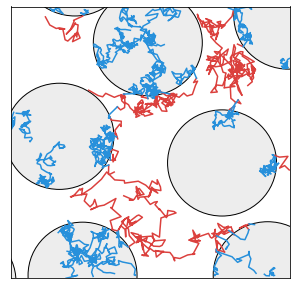

In [823]:
fig, ax = plt.subplots(figsize = (5,5))
for t, l, c in zip(trajs_fov, labels_fov, colors[::-1, :]):

    plot_color_lines(t.transpose(), label = l[-1]-1, ax = ax, cmp = cmap)
    
    
    c = matplotlib.colors.rgb_to_hsv(c[:-1])
    c[1] *= 1
    c = matplotlib.colors.hsv_to_rgb(c)
#     ax.plot(t[0], t[1], c = c, zorder = -1, alpha = 1)
    
for c in comp_center:
        circle = plt.Circle((c[0], c[1]), r, lw = 1, facecolor = np.ones(3)*0.93, edgecolor = 'k', zorder = -2, alpha = 1)
        ax.add_patch(circle) 
plt.setp(ax, 
         xlim = (fov_origin[0], fov_origin[0]+fov_length),
         ylim = (fov_origin[0], fov_origin[0]+fov_length),
         xticks = [], yticks = [])

fig.savefig('fov.svg')

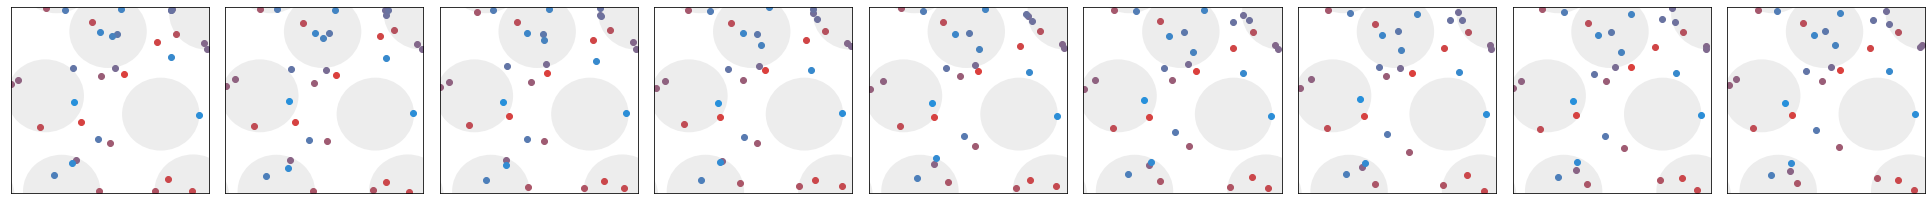

In [911]:
times = np.arange(1, 10)
fig, ax = plt.subplots(1, len(times), figsize = (3*len(times), 3), tight_layout = True)
for idxt, time in enumerate(times):
    for c in comp_center:
        circle = plt.Circle((c[0], c[1]), r, lw = 0, facecolor = np.ones(3)*0.93, edgecolor = 'k', zorder = -2, alpha = 1)
        ax[idxt].add_patch(circle) 
    for t, l, c in zip(trajs_fov, labels_fov, colors[::-1, :]):
        ax[idxt].scatter(t[0, time], t[1, time], color = c)
        
plt.setp(ax, 
         xlim = (fov_origin[0], fov_origin[0]+fov_length),
         ylim = (fov_origin[0], fov_origin[0]+fov_length),
         xticks = [], yticks = [])   ;
fig.savefig('frame.svg')

In [926]:
plt.plot(trajs[.shape

(100, 250, 2)

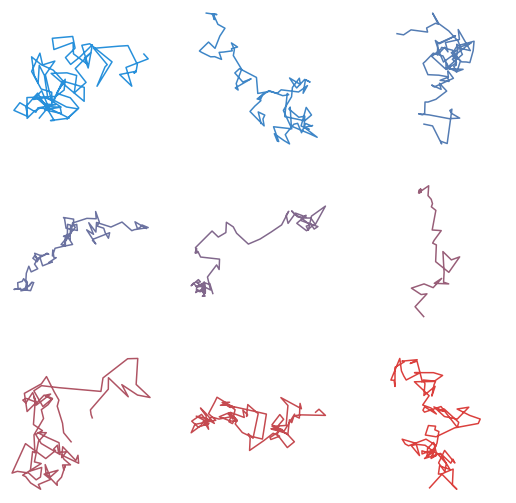

In [931]:
fig, ax = plt.subplots(3,3,figsize = (9,9))
colors = cmap(np.linspace(0, 1, 9))
for idx, (t, c, a) in enumerate(zip(trajs.transpose(1,0,2), colors, ax.flatten())):
    a.plot(t[:, 0],t[:, 1], c = c)
    a.set_aspect('equal', adjustable='datalim')
    a.set_axis_off()
plt.savefig('trajectories.svg')

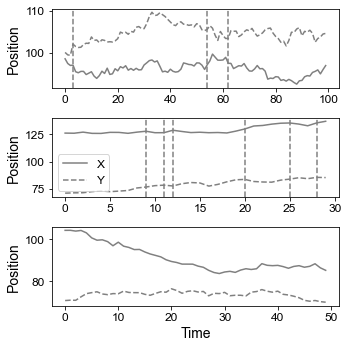

In [833]:
fig, axs = plt.subplots(3,1,figsize = (5, 5), tight_layout = True)

for idxa, (idx, ax) in enumerate(zip([1, 8, 9], axs)):
    ax.plot(trajs_fov[idx][0], c = 'gray', label = 'X')
    ax.plot(trajs_fov[idx][1], c = 'gray', ls = '--', label = 'Y')data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAB5AAAADQCAYAAADBJf1XAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8QVMy6AAAACXBIWXMAAAsTAAALEwEAmpwYAACse0lEQVR4nO39fbxsV1nni/7mW81ZL2utvZPskGSTxIBJFJAEJBgQEfDGaBQMEVttvA3t9dr04VwOetWm1XjvJdhNN54W6cPR7tutHVs4vtAhgqYNOYDYiJEgRAVbQEwnIS9kJ9l7rVUv832eP2qP2lW15qyab2OOMeZ8vp8Pn5DK3qvmmlXPHGN8x/M8Q0uSBARBEARBEARBEARBEARBEARBEARBEAShi74AgiAIgiAIgiAIgiAIgiAIgiAIgiAIQg5oA5kgCIIgCIIgCIIgCIIgCIIgCIIgCIIAQBvIBEEQBEEQBEEQBEEQBEEQBEEQBEEQxFloA5kgCIIgCIIgCIIgCIIgCIIgCIIgCIIAQBvIBEEQBEEQBEEQBEEQBEEQBEEQBEEQxFnMIn/4ggsuSL7u676O06WUJ0kSxHGMJElEX8pWNE2DruvQNE30pZQieeJBIA6O/gfdgnbh5c1fT+IhwgxADEDHLNDw8P5p+FGAnmHh4tH5ON7fqeW94jhGHMeZ//0v//Ivn0yS5ETRn/td3/VdCQA8+eSTFa6OD9t+Z5nQdR26TjkxdTCPq8mR1w0MoWl27e8XRdHG53fZ2JJ1zAIotmQgmR0Ch08DcQjoJrBzHrSaxgtZ6GJsbfudZcIwDGXng10mSRJEUbTxz7QttmitRTTBttgqG1cAxVYdUGypCy+PAcgbW7TWIpqgi2stii2iCboYW+Qx2s36/pWBPhe/vvkaynuMQhvIX/d1X4fPfOYzBS+vGeI4xnQ6he/7oi8lk8FgANu2lQ4y71++FkDaA02D/c8/2Oi1uOEDGIf3Ajj35Z8FIX7u/7wXf/ClB+d/xrTxz77rLfiB576q8vslSYL9/f3MydL555//YJmf++STT0obV8B8EJtMJgjDUPSlpKLrOgaDAXq9nuhLaQ1Pux9EnLKBrGOI85zX1v5+URRhf38/87+XjS2ZxywACIIAk8lE2gWYYRgYDocwzUJTBSUIv/AJRHf970DonXvRtGHc9D/BfO63i7uwmvF9H+PxOPO/tzG2kiSB53mYzWbSLsAsy8JwOCShoTCz2Qyz2Szzv7c1tmazGVzXFX0pmdi2jcFgoPRaq+scHh4iCFKSlVE+rgC5Y4s8BsEbXh4DkDu2yGMQvCGPQR6D4AN5DPIYbSJt/wowMDKvh2Ne0ei1lPUYrfnEdV3HaDTCaDSSbpDo9XrY29uD4zjqL7p2Lyj2Okem4f1YDT6gb5n4f3/rtYt/n4UebvuT22t5P03TMBqNavlZKmEYBnZ2djAYDKQaJDRNg+M42Nvbo0VXzaRtHm96vSpsgt81LMuScmxgMmN3d1e68bQuoj/+rdXNYwAIvfnrEvB7X/gYnv+rb8D5/+omPP9X34Df+8LHSv2cXq8H2242q1E0y2ODbL+7YRgYjUbY2dmRajwliuM4Tmufj1lomrYYGyzLEn05K1iWhd3dXQyHQ6nGU6I4XfwMyWMQvCGPQR6D4AN5DLnGhi54DN644QN42v0gnnR/C0+7H4QbPiDkOshjyPW7k8eoRtr+FRCdfT0/dXjCsh6jdU/UXq+HXq+HKIrgeR48zxOSuWEYBmzbRq/Xa1VwGa/4kfSqrVf8SOPXkrWZdfHO6gTukYNTtb2naZro9/sbszXaCBvIHMdBEATwPE9YlrxpmovYkmmyWifhFz4x38g6eBLYvQDGK36k0apIHcPMCmTG733hY7jtT27HIwencHL3BG59+RsqVfrbtg3f9zOrTtoKE/L9fn8RW6LuAZukm6bZ2thacJBxZEDW6w3ye1/4GN76R+/B7Ow4+9WDJ/DWP3oPAJSKscFggCAIpM0Q54Wu6xgOhxgMBov54LZ2PTzQNG0ltoh2oGkahsPhxqqTtmKaJnZ2dhDH8SK2RDxfdF1fxJZhGI2/P8EH9uzeVHXSVshjdBM3fADT8H7EmEDHEAPzWi7VKOQxyGMQfCCPQR6jLaxXScaYnP13NF4lCZDHII/RHuoo0qrLE5b1GK39BhiGsRjMfN+H53mNtK6xbbvVwcU2sURubjGyNrkeO1x97eRuqeN8MmGLD1lbIfHGsixYloU4jhexxXsw0zRtEVttl4RHWusenJr/O9BYnA3Ma1PbawzMawHUv8HFYIOYrO1aeMImZ0wcstjiPVnWdX0RW52ShLsXAGnJRQK6aaxz25/cvogtBuumUSa+WNXJwcFBXZeoFMviMAzDhTjk/ZzpkiQUnfQkClZ1Mpnw6c4hO7quo9/vH4kt3liWBdu2YVlW62OrqzBZ5Xne9j/cQshjdIemZT15DPIYBB/IY5DHaAObqiRFbCCTxyCP0RbyFGlto05PWMZjtH51sDxhi6IIQRAgiiKEYVh5sqhpGgzDgGmaMAyjM8FlPvfbpRCDaZtcsyDE//qn9y/+vW/auPXlb6j1fVm2xsHBQScniAxd11cGMxZb7H9Vf/ZybHVJEm5qrdtU3LHJYVY2fN0bXAzWwu/w8LD8xbcAwzBWpDz7XxRFlRdiuq4v4so0TenakDaF6G4am6pNsrpmVOmm0dWqk3VM04RpmotsZhZXYRhWHs/Xx6yuSEKRSU9NVW1toqtVJ8tomrYi5ZdjK4qiyrG1PmaRJOwGg8GglvW6ypDHaD/bZH3dHZ/IY8whj0HUDXmMOeQx1Kbpo+zyQB5jDnkMtdlWpJWHuj1hUY/R+g3kZQzDWAmEJElWJopMcrDgS5JkMdnTNA2apq0MWCQwxJK2yfX3T1u4//EZNGi1LLKyYP3/uz5BZLDBjMFia1kgstfZP5dja32h1enYkqS1rmNekSnieWxwMSzL6nRF1zLLUp4Rx/EipsIwRBzHK3HF/h6LLzbusdgigTFHZDeNbdUmJ3dP4KsHTxz5e1W7afT7/UXL2a6znCnPiON4Zcxaj63lMQtYXWh1ObZEJT0VqdqqW8Cvw+aDXa3oWma5GoSxPGblWWstj1u6rnc2tmQhLVHjw198gGtMAeeqTg4PDzvXujAN8hjtZJOs59XxiTzGKuQxiLrmieQxzkEeQ03qqJJcpq7YIo9xDvIYarKtSCsPPDxhEY/RqQ3kddhCito0Acn+54EnPg6E+4C5B1z4Smh7zxN9WVtZ3+T69suBv/qn39vIe1uWhZ2dHVp8pUCxVQGJW+syeG1wMWzbRpIkmE6ntfy8NqHrOnRdp4zbGhDVTWNbtcmtL3/DijAE6uumMRgMAIAWXymw81SJgghKesrbYo2XgF9G07TFfJA2kY/C5ATFl3qkJWrs+5/C3V+5dzEP5BFTDMMwFrFFm8ir0FqrHWyS9bw6PgHkMTZBsdUt6p4nksfIhjyG/NRRJcmoO7bIY2RDHkMNNhVp5YGHJyziMSg9jphvHj/2h/PNY2D+z8f+cP46sRG2+CKILJL9zyP58r9F8t/fMf/nlrgyXvEjgGmvvthga9083PryN6C/do11t4t3HGcxSSSINrGtNdQPPPdVePd3vQXP3L0QGjQ8c/dCvPu73lKLmNc0DYPBYKU6kCAqkZXcxDnpKW+LtU0Cvk7Y4ouEM9Em0hI1DD3B/+v65668xiOmFu93dhOZqvqINjKX8uutIueynmfHJ4A8BtEe3PABPO1+EE+6v4Wn3Q/CDR/I/Xd5zBPJYxCq4phXYGRev6g41jHEyLy+1KZX3bFFHoPoOrw8YV6PQZaDmFceJ2s9z5Ng/vrZKuT1Vj4sC5y1ylpvkbV8PkXb++dbloXd3d3Sf58y6tvLIjmDxRdLzgAWFf5JkqyeX3HZC6G98h/D/LPfA8ZPAaPzEb7kB+Bf9kJo4/GR1o4iYAMU7/aFjuNU+h0ptrrNeiufvK0debefy9Ma6gee+youxy8A586/q9KqqMvn5hGrLYmT618H42P/EVroL/57YvYQfcv3wz88PNLasa4WWXlbrPEW8Muwxdd4PK79ZxPtJ60lMXt9mfXWjjzbz2Ulaly8c7SVIY+YYhiGUWmtRXQbmT3GppaGvDs+AdU9BtFtjniMtbWW8eU/O+c0ds5H8q0/BOO5316rxyhypEkavOaJ5DGIKoj0GFWrJBk8Yos8BlGVtDb667HFvl+8PEYVeHnCPB6j0AYyDWIthVUer5GE+5iMxysSowzr55mx4GsTVSpO4jiG67pwHKfGKyKkICM5I/7aRzHVL1+RGCs868Xwn/Xi1ddSDrZfP8+syU1lnhtcy1RpxcIm3lQR1n7YZ70uMYrg++c2wNYni5Zl1TZhrLM1VKXrqJAZH8cx4jimirAOwOJpXWIsuOI6GC8P0fv0HdDGTyEZnQ//xbcgetaLU8et5Q0vNm6Via28cdSEgF+GndtaFnZ/ZVigEnxZH7OKrrWCtfhaHrPqar+alajx2OHR13jF1OJaKo435DG6AdvQWh6zZPcYWbKe55Emy1R9VpCM7wZJkiAIgtRkjDSML/8ZzD+5/VyC4eFTwP/5/8fM9xFd+ZLaPEbeI02y4DlPJI9B5EElj1EEnrFFHoPIw1aPUZC6PIasbPMYhTeQgyCgMwvahrmXuokc66OVgagsyws5dl6BaZpwHEfYYCYb0+kUvV6PBrG2kZGcoUWHR8RfGdhCbvln9Xo92LbdusGsLOPxGHt7e3QvWkoQBPA8r5axahm2sGCxpWnaSmxVYVO1iSqws72qbJQR8sLGFtd1c53pG135EsyufEmun70u83Vdh23bsG270Bwobxw1JeCXqZoV77ou+v1+jVdEyEKSJPA8D57nVdrUSmM9tgzDgG3bldYXaYkaUazh3977hZU/xzum6oA8RruJ43gRW2WTBYwv/9nRZKgrXyLMYzTV8akqbCORPEY7Yd993/cLiffep+9Y6U4DAFroo/fpOzC78iW1eYy8R5pkIWKemBfyGO1GRY9RBFljizxGuynqMYpQl8eQmU3jTeGnx2w2o4VXi0iSBOF53wbj1B9BS84FVwITs9H13N43DEOMx2NomrYIuLZVJRfFdV06K6VFJEmCxNyFFh4c+W+xzm+y4vs+fN9v5WBWBjZ5rpIBTMhFHZKwKMvS3zAMOI6DXq9XekFfV2sokfi+jyiKOj92t4koihbf86YqiuI4xmw2W6wvbNvOLeXzxJEqAn4Z1pWGhGF74CUJNxFFEabT6SJJlcVWEdISNUa9a3Hjsy/Gpx9RJ6YY5DHaBZOEnudVTsw1vvxnsJeqJbXxU7D/5HZ4mCdJLdOkx2iq41NVyGO0iyRJ4Ps+PM8rLeC18VOFXgfKeYy8R5pkIfM8kTxG+2iDx8iLzLFFHqN9qOYxVKTwBjIr/aZAUxtW4eC6LhLtMlg7r0B/fC/0eIxYH2E2uh5B/6pGr4Nl83Z1guR5Hvr9fmsfNl2BDSK+78McvBjDgz+GhuaSM9avgw1m/X6/sy2QXNft7HNFdZL9z89bwYf7SMxdeDsvwaz3bKHXFEURJpMJJpMJbNtGv9/vbJKG67oYDvMJGkJefN/nkqVbFFaJwqR8XXMiVQQ8g4lb27ZFXwpRgbqqjbOqIovApDyrSrZtO3dspSVq/MBzr1AqphjkMdrBiseoSRJuq5bcdh3kMchjtIFlj1E1tpLR+ambxcno/NzXkcdj1HE0kMzzRPIY7SAMQ8xms1q6EFahaY8he2yRx1CftnsMmSi1m0CBpja+72M6na5kPAX9qxrZMN4Ey+a1LAvD4bBzQp6JJjoLWU3Y5zebzRYLrqB/FSaAkOSMZdhg5jhOKweybbDWc13dQFeVZP/zwGN/uDhHXAsPYJ/+KMLdSPh4xWCbA4PBoJCQbwu+72MwGHTu924LcRxjOp02WhWZBybl2feri+LMdV3aQFaYMAwxmUwqt6kuUhWZB1aV7HkehsNhJ+dF5DHUJs1j1EGZasllyGOQx1CZNI9RFf/Ft6yMXwCQmD34L76l0M/Z5jHacDTQJshjqE2SJJjNZnBdV/SlHIE8BnkMlSGP0TylRiGWYdi1ibHqyBpg6wRBgP39ffT7/c4NZLTwUhOWyZeW9SRDcgaDDWTD4bBzLfxc16VzTlTjiY8vNo8ZGkL0x/dKE1MMNrYOBoNOLfBJGKoJD1HIgziOMR6P0ev1MBgMOrXuiKKIzmtVkLpFYZmqyDxEUYSDg4NOJhaSx1AT3h6jSrXkMuQxaD6oGps8RqWfe+VL4AGVO2gwNnmMNhwNtAnyGGoSBAEmk0ljrarLQh6Dxi2VII8hjtJPB7b4ItTA8zxMp1OpA2wZdrA9myR2pdUYCUO1kDmjMIs4jnF4eNiqgSwPvu8jjuPO/L6qE8cxEO4jTbvp8bjx68lDGIadFPKsUrIrv6/q8BKFPPF9H0EQLDLku4LneTQfVAgeorBqVeQ2uppYSB5DLZrwGHVVSwLkMbr0LFGZJjxGdOVLKiU7rUMeoxu/r+qoUri1DHmMbvy+qkMeQyyVNpAdx6FAkxyW9aBSgC0ThuEii7cr3zfXdWnhpQCsVZnsGYVZtGkgy4vruhgMBqIvg9iC7/uYTCbY0UcwUjaLY13uDGwm5EejUSeyeOM4RhAErWrP01bYeXLrWLMvCT9qYRtJkmAymSxa73ZByPu+T+e1KgDbLPI8r/6fXVNV5CaWhfxwOOzEWos8hho06THqrpYEyGMQ8kIeQz3IY6gB8xiqFG6tQx6DkJUsj9Ekxpf/rNQ8sS0eo/QTIY5jhGFIE0SJiaIIh4eHyk4Ml5nNZoiiqBNiIwgCyjCUHN/3MR7LWQVZBDaQxXHciUoM1pqHkJflieFsdD2GB38MDefEYQITs9H1oi4vN3Ec4+DgAKPRqBMLEt/3O/F7qgp71qdlwluzL63EmRGPMTz4Y0wA6TaRgXMZ8js7O50QG77vd2J8VhXeG1x1VkVufa+zCQs7OzutX4OQx5AfER6j7mpJBnkMQibIY6gJeQz5kWGDqw7IYxAykSQJ3Cf+AtaZT8IWmOxufPnPVtZk2vgp2H9yOzwgd7Kh6h6j0hXTwktegiDAeDxWNvMpDda6ZWdnp/WLrzAMax/Efvtz9+AX7v4P+OqZJ/DMYxfi7Tf+GH7oBTfU+h5dwPM8TCYT0ZdRK7PZDHEcYzAYtDq24jgmqSEpaRVcQf8qTADpKyM3MR6PMRgMWn+2ThAE2/8QIYQkSXB4eJi5wdUf37uSpAHIe9Y4g/1Oo9Go9esQVTsIdYEmNrh4VEVufL+zZyPv7Owomx2fF/IY8lKHx5CtswZ5DEIGyGOoC3kMeeHZiaYMZask1yGPQYgmSRLMHv8MnDMfFZ7s3vv0HSsJvQCghT56n76jUPKhyh6j8gZyVWhTq36CIMDh4aHoy+DCcsZGmydPdS+8fvtz9+DNd/wSpsF8UvPwma/hzXf8EgBQvBXAdV1Mp1PRl8EFz/OQJEnrs+NJasjHpurIoH+VtJtYeWHn9rU5Oz5JEmq1KyFJkuDg4ABRFGX+mawzxWU9a5yxvPhq8zOdNpDlhG205t3gqrKZxasqMgtWebK7u9vqZzrFlpzU4TFk7axBHoMQCXkM9aHYko9NHkMEdVRJLkMegxAF8xjDgz+VItk97UihTa9vQlWPUXkDOUmS0oN0k5taSZIgjmNEUYQkSY4s+NnvoGkaTNNUdlLf5s1jBsv4393dbe0EsW6p8Qt3/4dFnDGmgYdfuPs/VI41NuDGcbwxtnRdh2EYysZWmxddDDbxbfPiS6WFF4sttvmTFVuGYcAwDCU/M9kWXbxg7azavPgKw1CZhRebD7LKwbTY0jRtMW6pGluHh4cbN4+B+ZniKp41zhiPx9jZ2VEugzcvqkkN1hqYxVRWbLFxS0XKbB7LuJm1CSZt2ryJXNVjNAl5jGLI3FmDPIZckMdoD+QxisG7kIs8hhjqqpJchjyGXHTNY8iS7J6Mzk/dLE5G55f+map5jEobyGxQKNu7m9em1vJgFYbh4v8XaYPEFmCGYSz+qeu61MHXhc1jBlt8tbUNVN1S46tnnij0ehZJkqzEFPv/RWAD2XJ8yb4Y68Kii8EmwKORGpsHRZG1RQ2bCC7HV9HYYguw9XFLZqbTqVSLLp7MZjNomtbaNlBhGMK2bdGXcQS2obUcX0Vbzq6PWbIvxra1rV5G5bPGGWw+qMriqygySg22obU+Jyy61lofs2SPLbb+KPJ7yryZtYm2byJX9Ri8II9RHVlkYxbkMcRAHqP9kMfIR92FXOQx5KHOKsllyGOIgTyGPMnu/otvWanuB4DE7MF/8S2Vfq5KHqPyiqnKwquuTS1g/iULggCe59UysLKft/yzNE2DZVmwbVu6DzeOY4zHciyKmiIMQ0wmk9ZOEOuUGs88diEePvO11Ne3kSQJPM+D53mFJ4JpsPNb1mPLtm3Yti2dpArDsDOLLobv+3Bdt5UTRCbhZJg0xXG8iK06zlBMW6zpur6ILdkWYa7rSnNWUFNMp1MYhiHdHKIOZKo4iaJoEVtVzlBc/nnrsWWaJmzbRq/Xk+J5ssx0Os39ebThrHFgnsG7t7cn3XOuDmSSGmytVYcwYzI/DMOVsWB5rSVTbCVJgvF4XHi8ln0zaxPsd25rtaQsG8jkMer1GLLIxk2Qx2gG8hjkMdpEXR6jjkIu8hjFPEaVo0yKwKNKkkEeoxnIY6x6DFmS3aMrXwIPqOV88XVU8Ri1bCCXpcqm1vL71xlcm0iSBL7vw/d9GIaxCDgZPuTJZML995cR9nmo0pK2CHVMxBhvv/HHVrIMAWBg2Xj7jT+W+XeY0GtigydJEriuC9d1pRrMmDjrItPpFJZlSbcQroOmNpDTWkP94LX/t1ol4TbiOMZsNsNsNoNlWXAcB6ZpCo+tKIo6JzQYk8kEe3t7wj+DuqlzzCoDm6N5ntfIIpBtfE2nU/R6Pdi2LYUsZfegCG04a5y1kdvZ2RF9KbUjOrbqloTbYBtfskn52WxWat2rwmbWJqIowmw2w2AwEH0ptVPFY9TR/pM8xpy6PYYssnEb5DH4QR6jHo/R1KZX3ZDH2EzZQq66k5220RaP0eRRJryqJBnkMfhAHmNOmseQKdk9uvIlpVvBb0IVj1H5G1Il0MpsagHNB1cabNBgARcaD+Ig/DTC5BCmtoPj9kux07u6kWtxXVfatqxNMJlMlGgfVJQ6BzEmNLaJjrqzdMswib6Mp9z7kbgT6NoQx3svxZ7zjUKuZTqdCp9MiKStVSdxHHN/XqS1hvqf7vglTKdT3PyN38b1vbNgUl50Nm+XEzOA+fevjVUn7Oy4pp8XTBL6vi8kkW553GRS3rZtIc9N9t3qKkEQtLLqRNQ8pM5q4zKsS3nHcYRVJYdhCNd1S/1dVTazNuG6LizLal3VSdnYqtL+U0aPIbIqmYfHkEk2boM8Rn3I4DHWpbzjOMI2Mat6jCY3vXhAHiObooVcvBMJPe0BuPr9SDCBhiGc+FrYyRUrf0Zlj9HkUSY8qyQB8hh1w8tj5IkpQB2P0YZk922o4DEqbyBX+ZLn3dRahrX7ETUpTOMw+CJm0b2ANr+mMDnEk+5HAYD7JnKXq7gYLFtjNBq1aoJY9+Tsh15ww8bY8jwP0+lUaCW7pz2AmX4ulmJM8JT3MQSBj/NHz2/08y1TxdU22lp10oTUSGsNNQs8/ItP/JawDWTGcjZvv9+H4ziNxlbZKq420daqkziOGxNl7Hss03OazclmsxmGw2Hjn29Xu9Es08aqk6ZFPPsey5ScGoYhxuMxDMPAcDhsNEu+atKTSptZm2hj1UnZ52XZ9p8yegw2H7EsC4PBoNFnJ0+PoYpsJI9RDzJ4jGWWpbxt2xgMBsp5jCY3vXhAHiObvIVcLJFvNptVfs8s1v1fgsn832Okbnip6DGaPsqEV5UkgzxGPe/Fy2MUjSkGeQzxyO4xhFYgA9s3tRhJkmA6nUolChmufv8iOBkJQpz2PsV1A7nrVVzLsCoJmbM1itLUw1MmUZgWS9AiHMafgbl/OQaDQSMDWderuJZpY9VJE1IjqwXUowdPcn/vIsxmM/i+35iQr1LF1TbaWHXS1Ljl+77Uiww2P7MsC8PhsJHPuOvdaJZpW9VJU9/zJkRhVaIowsHBQaNCvo5uNKpsZm2ijVUnZT/Xou0/ZfYYjCAIsL+/j8Fg0Ej1CXmMc5DHOEreFvEyeYwsWLtf1TxG05tePCCPkU6eQq6mEp6y/J+r3w87yt7sAtTxGKofZZJGFz1GHUeXAPw9RpWYAshjiEZmjyG+yXkOfN+XupVsgvQJWpgccn1fquJaRfZsjaI0cRYWy9aVhaxYSjBBHMeNDWQyb0yIoI1VJzxJkgQn9y7AV/dPHflvl+xeIOCKNsOEvOM46Pf73D5nkoWrqHLWiUzEcYzf/PM/xDs+/pt49OBJXLJ7Ad728tfjlue8XPSlpcKEfL/f5yrkqRvNKm2sOuHdVk3GyshNNCXkqRvNKm2tOilKkfafsnuMddhGN28hTx5jFfIY58jTIl5Gj7EJFT1GWza9yGOkk1XI1XTC0yb/lwcVPEYbjjJZp2seo8rRJQyW3MN7o7RqTDHIY4hBZo8hdbpIHMc4PDzEeDyWetGlYZj+ejLk1konjmOq4kqBHjz5CMMQBwcH0t2vzFhaep0NZK7rcoktdr4KcQ563uTH933s7+/jn33b69E37ZX/1jdtvO3lrxd0ZdtxXRf7+/vcvv+u60o9louAnjf5YJWRv/GpD+En//B/wyMHp5AgwSMHp/Azf/SruONv/kT0JWbCRMzh4SE3WS5zxago6HmTD/b9PDg4UG4zhwl5XutEdm+IVWRqEyuKt9/4YxhYq3O89fafqniMNJiQJ4/RLPS8mbOpRTwgr8fIg0oeYza6HslavZGKm170vMkP8xhNJs7l8X95kNljBP2rMNl9BSJ9hARApI8w2X2F8p1puuQxto1Lm2Aeg+f3c5m6YgogjyEKWT2GtBXIYRji8PBQiQWqE1+70mMeAJAYcOJrF6X4Ozs7tWYaUjZ8OkEQIIqiVmTv8srw8X1f2irATbG0DBvIwjDEcDis9V7RAiMd1lqNW1bn5IvA4aeA6BAwdoCdl0Ib8j1Dvm7YeTwAFhWR7/yT9zVSKelpD8DV70eCCTQM4cTXbjzjJAsmPPv9Pvr9fm3XxyoFiKOw9mpEOizD2fd9/Ms/eR9m4drZ4qGHd/7J+6StQmaEYYj9/X2MRqNaq/fiOIbv+7X9vDbhuq6U2btl4DH2sue9ahvH6/i+jzAMMRqNaq2YDIJAysW7aOI4RhAEna5C3tb+UyWPsQnyGM1CHmPOphbxMnuMvKjiMYL+VZhgfhayHo8R6yPMRtcruenF22O0gWWP0SR5/V8eZPYYbTjKJI2ueIyiR5cwlj1GU9QZUwzyGM0jo8eovMrmMQgHQYDDQ77tn+vETq4AYmTKe5bFu7OzU8uCgGWwEOl4nsct0Jrc5OIRW67rSp2tuy2W1vF9H3EcY2dnp5b7FUVRZ7LoisIGd9u2t//hgiSTLwL7HwWSs219okNg/6NIAC7xVXfbsKxWT7c85+WNbGp52gMrk8QEk/m/xyi1iQzMF5FxHNd2xiSJ+GxIGGbDKgzDcP5syDpDXLazxTcxHo8xGAxqO+uQ5oPZeJ7HtZ1dU/C4/iiKcPu9f4B/8YnfEtoOvu7kp9FoVJvIok2ubFzXbcUGcpXYymr/qZrH2AZ5jGbh6TGapEpsZbWIP7l3QqrN46rjlwoeoy2bXjw9RtM05TGaoqj/ywN5jOaow2PIUkiy6btS5OgSxrrHaAoeMcUgj9EcMnqMyhvIdQ9gnudhMinWm10G7OSKjQeSx3G8WHxVzY73fV/5jGae8Ao01Te5ptOpEg/obbG0DmtjVUd2vAr3RySe5/FZeB1+6lxcMZJw/jqH2Krz2cDOwxGZeODq969mGAKAFsHV7y8US+t4noc4jjEajSrfM4qtzbiui+GweFuhKvCYR9Q5bqVVR16yewEeOVDjbPFNsLagVbPjqbJ/M0mSCBGGdUumuueDYRji9nv/AD/9R7+6qOhn7eABNLaJXHfyU5Iki03kqpublFC4mTAMEYYh1zNym6BLHqPKZhd5jOaQURiWoUpsvf3GH1s5axIA+paNf/Zt/7COS6uFusYv8hjNwc1jNEzbPAZQ3P/lgTxGc1TxGGUde9MeI21cWj+6ZBnRXZ54xBSDPEYzyOgxKq+a6lx4+b4v7aKrDpjYqJqBQgPYZrg9iDZscvF4vzpjS5XN47JEUYTDw8NK0pY9oIlsmDCsnSijUiM65FIxX1dsybLoSpA+bma9XoQgCDAejytN0rl9b1oEW+Q2Bfvu1ommabVJjaxF19te3szZ4p72APaND+KM8VvYNz4IT3ug1p8P1NMqzvM8EvFbaHruwzZa6qTO+SBrrbupHXxTbEp+qsJ4PK48n2vznLkumpY+POYRXfEYbLMr0SaABiTafLOryNhGHqMZRAhV2TzGD73gBrz3lp/CpceeAQ0anrl3If71jf9UqqNK6hy/yGM0g4j1KHkMsZDHaIZKHmNTIUkGIjzG+rh06bFn4L23/FRqJxrRm8dNQB6jGWTzGNJUILfhPJM8sMXX7u5uqTYPrEUEsRnXdWHbdr3ZuxmbXEl0yEUY1BVbs9msE4t1tvgqm8FLA1g+XNfFaDSq94caO6nxlegjLt/dOmJLpkWXhmHqZrGGeipagyDAZDIpfU5XF54/deD7fm3tgLYxnU5r/+7WNWZtWnQ1cbY4j5bwWbCFV9kMXsra3Q6rJG3ifC42Lshagbx8LqsM7eB5Jj+Nx+PSlchxHFNs5YBVStZdxZsGGxfqpiseo65ONeQxmoGLx8ggDEMpPQZrES/qXNZt1D1+kcdohiIeo2pbXc/zyGNIAHmMZijtMTYUkmQhymNkHV2yTBc2jxnkMfgjm8eovIFcR+uqMAylXnTVzfLiq+gEgIIsH3EcIwzDegMta5NL49N2tI5zpjzPk3LRxYsoijAej0udJUSTw3yw85pqFYY7L11tXQMggYmJcU1973EWwzBqETI8Jq5lceJrVza8AACJASe+trb38H0fmqYVbk/EzpwituO6biMbyL7vc5lL1DEfZBPXTYsu3meL82oJn8VsNoOu64XbE5GIz4/neY0svFzX5VKlUMd8kAkNJphlaAfPO/lpPB5jd3e38LOJxqz8sE1k3kwmEy6bI13xGHVudpHH4A8Xj5ECjyouRts9Bo/xizwGf/J6jKpH10VRxCUxo40eownIY/CntMfIcOwwdlL/uOoeo22Qx+BPWY9RNAkqj8eovANQdXLIc+IqM3Ecl2pp0qWBviq136udlwLa6sCSwMDUvLbe98F8AKs6OeQ1cc3iA/d/HNe864244Oe+B9e86434wP0fb+y9lwnDsPAiKoqiRtvHqk7dglwbXg3sfce5iaKxg5n9EgRm/Zs1dUwOeU1cy2InV6AfXw8tGQIJoCVD9OPra6+W9Dyv8HOVWj7lJ45jLhPpZPJFJI//BpJH3oP4sd+Af+ava38PoJ7Y4rUBVwSeVZFZTKfTwp89zQfzEwQB98qcMAy5ie46NhHWN+Caage/CSe+FkjW1pE1Jz+V2Xik2MpPE/fKdV1u79MVj5G1qVV2s4s8Bn+auFfT6ZTL+ldFj1EUXuMXeQz+5FpnlGiru/hjHMeFNnqMpiCPwZfSHiPFsUMz56+nvAevcaEtHkME5DH4UsZjLJKgWHIGS4KafDH1z+f1GJWipI7JIa+JqwqwwTtvtkYURdSapgA8NrkSYJHFkegjTIxrpNzkSpKk8c3jt975HsyC+WT0q2eewFvvfA8A4HXXvrKx62DMZjNYlpX7PnZxoK9CEASl2kJuQhteDZzNiJrNZvA4ifiqscVz4loFO7mCS3XkOuPxGHt7e7mrTii2ihGGYS1VG4z1DHotPsQgvhcJUPvYVTW2eG7AFYF3VWQabMwuUnVCsZWfJEkQx3GtsbX+83nJQk3TKnf8SNuAa6Id/Dbs5Aognlf9J5hAwxBOfG2tyU9RFGE6neauOkmShGKrAGEYIkkSbq122efHgy55DB6dashj8IX3c4jnJpJqHqMMPMcv8hh8yeUxSrTVZbiuy62yrq0eoynIY/CljMdYd+ybKiV5daMB2uMxREAegy+lPMamJKi12CriMSpvIFehq9lPy0ynU5immevLQEFWDB5Sg21yxXGM/f19aQewprOfbrvn9sXmMWMWeLjtntuFbCAD8wnG7u5urs+fYqsYPO8X78lX1UounhNXFUiSBNPpNPf5URRbxQjDsHALoI2kTB41ROiH99e6gaxpWqXNOZmquJpoCZ8GqzrJ0w6WNrmKU3dyxjI8N5GqbnJt2oDj3Q4+D00kP3meh16vl2v8p02u4kRRVEvlxjq8x4UueQxem13kMfhRxmPkbVfIexNJNY9RFp7jF3kMfuS6XwXb6i7/bPIY8kIegy9lPcZyIUkWPLvRtMljiII8Bl8Ke4wCSVBFPIawDWQR2U8fuP/juO2e2/HImVM4eewEbr3hDcI2txhFsjUoyIrDS2rwnnxVuWYR2U+PnDl6jt6m15ugSNUJxVYxmGCtu+KE9+RL1/VKlVw8J64qkbfqhCaHxan9fmVMHvWk3vlX1XFWpiquJqois8hbdUJnBhUnCIJ6kzPOwnsTqUpskdA4R96qExqzihOGIZe1Fs8qLkA9j1EVHptd5DH4UsRjFDmzlTyG/JDH4Ecuj7Hz0tV4AjLb6jLIY6hBVz3Gg5P78VeH92AancHAOIbn79yAy4fX1voevO4Xz240QLs8hkjIY/CjsMfImQRV1GOUjhRN0yplQDWd/SRbi91l8mZrtGkAa4ogCGqXGr7vc518maZZenIoShaePHYCXz3zROrrIslTdZIkCQ1iJQjDsJZzGZdxXZfr5KtK223eE1fVyFN1QmNWcWpPzsiYPMZave2Yq2zMyVjF1VRL+DTyVJ1QbBWn6j1Lq+zC4Cru40KVcYv3BpxK5K06odgqTl33bDnGEn2E0LgG4HBMEKCex5AZ8hj8KOQxcrYrJI+hDuQx+LHNYxRpq8sgj6EOXfMYD07ux337dyJK5s/+aXQG9+3fCQC1biLzKjLh/d1tm8cQCXkMPhS+ZzmSoNjauAilU5gcxyn9YOA9cU1jU4tdGZjNZhsnfzQ5LAePSZzrurX/zGUcxyn9d2ezmZDsp1tveAP61urA27ds3HrDGxq/lnW2SR6Kq3LUfd+SJJE6tmjRtUqeCQfFVjlqvW87L0WyliuYwMDMvLa2t9B1vbSIV+Gcu6aJomjrs5BiqzhxHJfe8FlUdrFkjLOVXeHBF7jOuSzLKt1SLYoiquJaw/d9+L6/8c9QbBWnjnu2HmNaPMYwuBdW+EDln52Gah5Ddshj8KHQ+JKzXaHMay1RHkNm2u4xHpzcjw8//i78ziM/hw8//i48OLm/kffNc9+04dXQLvrH0E6+Zf7PDZvH5DHUomse468O71lsHjOiJMBfHd5T+3vVfd+iKOI65yKPUS/kMfhQ1GNow6uBve84V3Fs7AB737Eyjvm+X3jOVbo0s0qWBu/BNQ0ZW+yu43keBoNB6n+jLOdy1L0ICcOQa8ZM1QFMVPYTq+KXrUU8MP8OBEGQmbVJC9Vy1H3ffN/n+pzr9XqlM+J5T1w3IePRC4wgCBBFUeYGB41b5agztrTh1fA8F6b7GejJBLE2xMy8ttbzj23briTi6XtyFNd1N25w0LhVjjiOy23IZlR26ZM/B5zX1nNxKVSRhSLWWirguu7GKh6KreLUcs9SYkxDhH54f63jFUM1j6ECbfQYTbT83ESh2MrRrpA8hnq02WM0VRWZBnkMokseYxqdKfR6FeqOLd5zLvIY9UMegw9FPca2s8XLzLlKbSBXGcB4T1yzkLXF7jKe56Hf76cGGgVZOeq+b7wXNlUy4j3PEzqAve7aV0qzsbXOJmFIsVUO1SaHKop4mY9eYLium3k+F8VWOeq8b3EcY4pLAefS2n7mOiTi6ydJEvi+n3lvKbbKUXqOlFHZpdV8lvgyhmFUEvHbKm27ShiGmcIwSRISQSVg961Sy8KMGNM5xJiKHkMF2uYxRG5uMQrdtxztCsljqElbPcamqkjVNpDJY6hJVzzGwDiWulk8MI7V/l51ewze4xZ5jPohj8GHOudIZdczpVZPKg5gMrfYZWzKvKQgK4dKA5imaZUGMMrazWbTA5IWq+Wo876xDFBeGIZR+iz0JiauWch+9AKwWfjQuFWOOu8b700k27ZLi3jeca86m+bLFFvlKH3fliq4Vn5ezWeJL1NlrUUifjNZsUX3rDyVn0kNxpiKHkMF2uYxmmz5mUWR+7atXSF5DHVpq8dosipyHfIYBNAdj/H8nRtgaKtJqYZm4fk7N9T+XuQxCIA8Bg/qvG9l1zOFRyLTNCsNYKIy4mVusbuM53mVFrbEKnVODpvIfiqbtUsD2HZc18VoNDryusoLL5HUed9kztoVuehS4egFIHvcotgSi+zncYmMLZlbwzNYy7myVajEUUo/k1Iqu+o+S3wZTdM2tlneRBNxrzqsUnJdGtGYJZCGYiyPxwjjRxAlXwLgAnBgaFfB1E8K9Riq0CaPIXJzi1H0mbSpXSF5DLVpo8dosipyHfIYBKMLHoNV9Is8kqEo5DHUhjxG/dT1TKqynim8E6xy1q7MLXYZWYHWpgFMRZoYwKh9Bl/YIfFls8wIPvA+l0fX9UoiXuTkUIWjF4D586eKOCJWqWu8D4KAa4anZVnlzpPFPO5FiXgVWsMzXNdNXXjRnLBZtOHVSID5Oa3RIWJ9hKlxDZezWYFqbUB5x/02VEjOAM5tIhNywGIs3v8ktGSCWBtiZl5be4xt8xjzzePPA2Ax5M7/PQZ893it19JG2uQxRG5u1Q15DPVpo8d4/s4NK23iAX5Vkbwgj6E+XfEYlw+vbWTDmDwGweiCx3hwcr9SiRlAtTlXoRkIDWDNkPaBtn1Ak50oirg+6AaDQaUBjOfEtU3QAlU+eH93h8OhsiJehaMXgHkWGz2D6qOu8Z7nwkbTtMwzo/Igcj6oQmt4RlZVDs0Jm0cbXg3ton8M7eRbMB58P7fNY03TlE3WZckZXz3zBBIki+SMD9z/cWHXlAW1+ZaQwVXYd16LM/0fwYHz2tpjLI/HmFcer8/7YkTJl8hj5KQtHqPJlp+84e0xDMMgj9EAbfMYlw+vxXV7Ny+SMgbGMVy3d7P08n0Z8hjqQx6jXshjEIy2e4wHJ/fjvv07F8mG0+gM7tu/Ew9O7hd6Xduo8rwrVIFcJeMtDENaqOckCAIkSdKawBJJXfeQ56Si6plBlP2Un7TPkeKsHHXdt6wznepA1/VKbVNEx5YqRy8A83u1LmYptsTCO7aqzAlFxpYqreEZQRCUFrPEKnU8k5Ik4dpqU9f10tcZxzHXuN/GpuQM2cYtdq+W5wg0ZomF93c335iVsUGTuOQxctIWjyFDy08VPAaw/Tqz2sID4tdaKtFGj9FUVeQ65DGIZchjyAd5jHbQZo/xV4f3rHTQAIAoCfBXh/dwGddk8BjlDjMugUihoSLrUqNN7WqapK77xvP7axhGpYcBxVZ+oig60v6JJoflUGXhVQUZYkuFoxeA9HvV5nGLZ7uaOu5bHMdcs86rxD/va9uGKq3hGVmxRecFFqeO2OI9Lqg8H1QtOaPtG8hNtlVTIbby4SBtEzlB+UTfLtIWjyFqc4uhgsfY+t4b2sKb+klJ4l4NyGPUR5s9BkvYMB0Xht2D716KKLig5qtrF13zGDwhj0Es02aPkXbMyabXqyLDWquxpyJNDouxfr9oACtHGxZe25D52mSEYqseVJgcVoEt0ol8pH2WbY0t3u1qZJgc8kT0tanSGp7RJanx4OR+fPjxd+F3Hvk5fPjxd9XeAqqO+yZzmzvRsZWVhKFKcoamaa2R8U22Vavrvon+/gKAoV2Fo3pER+RfLuJylIXWWvXQBo+xqS08IEfcqwTFVj201WOcS9hwoWmArvuw+w/AsJ4UfWlS0yWPwRvyGMQybfYY7PiFvK9XRQaP0cgnlyQJBVpB0qQGUZw6goz3uUFVkPnaZIUWXvVAk0Nina6MW5va1dQBxRZfXnftK/Hum9+CZx67EBo0PPPYhXj3zW+RttI/juMjWbptHLea2PBqyyZXFqKvjZIz5IH3OLVMHfdMFldg6idhaM/DvBIZABwYeB587zyRl6UcXZkP8qYdHiPr3F5XgmtTD/IY9dDWtVZawoamxeg5D4u5IIWgcase2hpbDJmvTUba7DGev3MDDG31mAFDs/D8nRu4vJ8MHqORFtY0OSwOOzOafUk0TYNhGK0o9c+CR6u1Ovrty3zPaQArzvo9a+uZDLyp477J/P2V+dpkJQzDlfOD2hpbvNvV0LjFH1VawzPCMFz5XrQxtnifI1TlbOGVa5I0tmTYgGMxdds9t+ORM6dw8tgJ3HrDG6SNNXYO1HpsyfoZF6HJtmp1PI/iOJbGFZj6SZg4ufj3+Zr8QOAVqUcXPQYP2jEfTG8LDzjCxywVIY9RD+31GOkJG5pGZ7ZuoysegzftGLeOwlrD6z0XfYtawxehrR6D+YkmjguSxWM0toFMFCNJEsRxvBJcpmm29l6yyhMmD1nlCYBKAWia1b/isrWmWUbOiavcrMdQ26RGU2fetT222vJ9aJL151Ed3xEZGRjHUiV8He1qDMOoZXIoa2zJsMmlIuvPozbGFu8NrzruWZIk0mxyrSPLmKV6coZpmvB99UUrz3FqHZoPEut0zWPwog2xZWhXrZ2BDAA6DO0qeDQfLEzbPUZTtCG20klP2EiS3tE/SqzQFY/Bk7Z6jHOt4WNo2jwhw+4/AA+gTeQctNljXD68lotrX0cWj9FI7bhsDwBVWL9vbQq0dXi1WqsrK15WZL42WUl7cLYltpo6866tk8NlZL42WVm/Z5qmtSa2luHZrqau+yXr91fWzTfZWf8825K5uwzvc4Qsy9r+h7Yga1wBcl+bzLR1rdVkW7W6pIasUGyVo62x1SRt8BipbeG158HUTwq/NhVps8doijZ7DEO7CuuKP0l0+O6lYi5IIbriMXjSVo9BreGr0QWPwRtZPEYjT0TZHgCq0KWFF4/KE9M0Wzs5ZMh8bTKTlhXveZ7AK6oH3i1AGXU9i2QVhqxygihG2j0zTbN1Fac829XIkl3IC4qrcmRJjTbF1vN3bljpRAPUu+HV3mqTObLGvOykSQ1N05S/n022VWvDJtcmZLm2D9z/cWXawwPd8hg8aJPHWG8Lz5Dh2lSkrR6jKdrsMUz9JBABQfy30DQfSUKtdvPSFY/Bk/Z6DGoNX4UueAzeyOIxaANZYtoqNdLg0WqtzZNDBsVWOdIWXm2gqTPv6siAAuSNLVmvSwXiOIaun8t8bktsrcOrXQ1VchFpdEFq8Nzw0jRt5blUFtljy7CeRM95mKRhAdY/UyY1giDI+Bvq0ERbtbo2uWSPLdF84P6P4613vgezYL5J9NUzT+Ctd74HAKTdRO6Sx+ABeQxxyJ6s0VaP0RRt9xi6djFmh33Rl6EkXfEYvGivx6DW8FXogsfgiUweo5EnopwPAflJu2+WZbXibK51eFSe1DU5lIn5+QtfwnwAc6CbJ0kOlmA9tgzDgK7r0i5k89LUmXdtlxqyXpcKUFu18ui63vqWPgkeQ3/n72iDqyBZ80HXTc+IVhVeG16WZdWyySU12uOw+w9A0+bzGDqfKx9p8z7LslqxgdwEbRfxgBzXdts9ty82jxmzwMNt99wu1cbWMl3yGDxoo8dYR4bYWkeFZI22eoymII9BZEEeozxt9hiGdtXiDGQGtYbPT1c8Bi9k8hiNnIFM1IfjONv/kIJcPrwW1+3dvNjoGhjHcN3ezaVFomEYrVt4zTePP49z2U8u7P4DMKwnRV6WkqQNYm2IrSbOvOv1erVkQBHdQNd19HqUnZmHNjyDNhHGjwD630LXfWgaoOs+jWEVsCyrtQv1urFtW/QlcEczzm0eL16j87lKQWNWfuqKLVnEiKw8cuZUoddlpe3znLpoo8dQhU3JGrLQVo/RBOQxiCKQx8hPm59Bpn4ShvY8ILGRJEAc9+DNrqAE3QqQx8iPTB6DUmoUwzRNGIaBKIpEX0rt1Fl5IlOQ1cW88jhdDs5o8CpEmqiybRuz2UzprM0mzryrc3JIrey6geM4VHGSgzaOW8tEyZeAjA0uGsPK4TgOJpOJ6MuQmjpFvNSbXFr6+Yd0PldxdF2Hbdt0puQWbNsmEd8QJ4+dwFfPPJH6ukq02WPUSdvngzKjQrJGWz1GE5DHIIpCHiMfbR+3TH3e+XNK6+7aII+xHdk8RsFVXwAEHweC/zr/Z/RI5QsgitPm7J460DSt1gFMHjmS3uKB5GA91P29EcXlw2vx6ot+Gj948hfx6ot+utbNY9M0a23lI4uMf+B9H8adl38b3q9fjQ9efj3+/v3voqrIkqR9pnV/b9qIbdu1xYMscXUUGsPqptfrSfx5y0HdslBe0ucvdD7XZrI+U1prbaeday05ufWGN6Bvrd7vvmXj1hveIOiKykOxtZn2eow5D7zvw7jz616J9+vfgD++5rV49AN3i76kFbKSMmRP1miLx+BJWz2GDHzg/o/jmne9ERf83Pfgmne9ER+4/+OiL6kU5DHK0Q2PQdQNeYztyOYxis0okxmW2+ci/nyuTWTZJq6qkHXfKNA2U+cABoj9/i4vsu561tvx0Ps/c+TPkBwsTtb3gxZem6lb+sgwNjzwvg/j0z/+c5g+9ASQALOHTuOzb/otfO3O36VN5BKQjC9H3ZNDGWLrKOm/I41h28n6PEkYbkbTtFpbz8kZV3OS6FlIktXro/O5tpM1ZlEL2c10ScTLEPevu/aVePfNb8Ezj10IDRqeeexCvPvmt0hzJmsa5DHK0SaPsc58zfXzmD74KJAkcL/6OD7/1ndKtYmsQrIGeYxytNFjpNH0dbFzw7965gkkSBbnhqu4iUweoxyt8BjRI1uLJWWNedkhj1EOGT1GwZXfeouOGIi/BBgnAbAzWr+E+SazA0O7CqZ+khYJJdkUaI7jYDabNXxFalD3Q0jUQMEWWdF0nrQxe+hpfPZNvwMzAb7uh1+EEECkkRwsQ9ZnyoRhEAQNX5H86Lpeu0yVYRL2lz/3bxBNV9tURtMAX/j5P8ClP/QSaq1bAE3TMsd7y7Kg6zriOE79712GxxkwMt5rQ7sKUfJ5LB/FQBtc+dg0j3YcB66bXt3ddRzHaa2IX0fHxXBnPnrOw9A0H0nSg+9eSudzbWHTZ2rbNs0HM2iriH/gfR/GX/7cv8H0occwuOxiXPOLP4kLb36V6MsCMN9ElnnDeB3yGOVoi8dIY77mWp2vxDMXX7rt13DJ624UdFWrsBi77Z7b8ciZUzh57ARuveENUsVe1zyGtf8FOKf+GHp4gNjchXviFQj2nlvoZ7TVY6TRtHvfdG64THGzDfIY5WiFx4gemRdHLhzF2WJJYLHXxa6LKA55jHLI6DFqSB2ef9jzzePVoIuSzwMxoOvnVX+bDrJNatDC6yi9Xo/LACaCtEVWNA3wl7f+Ia744RfBBBCFF5IcLMGmz9RxnNYtvOqg7ox4ALXHahmmDz2W+vrs4dPUWrcgm+KKZRjSuHUUHlnNIhOf1uX7Fa9/NYD52UGIgCD+W9rgKsimz1PXdfR6PTqfKwUeWc2ynt+p6zqi4AJKeirIptgiYZgODxEvw3xwPXF3+uCj+PSP/zxe4P8CLvg+dSS4LJDHKE6bPEYaWWsu95GvNXwlm5E9WaNLHsPa/wIGj98FLQkBAEZ4gMHjd2EKFNpEbqvHyKLJuYsK54bngTxGOVrhMeIvYTnB/eyLK8WSwNHrevQDd+NLt/0a3Ee+BufkM3DVrW+SJhlKJshjlENGj1E6Mh/4Pz6DO7/+/4f322/FnV/3Sjzwvv+MtKCLki9JPbjKzLZA6/f7DV6NGvC4J6LOvMhaZE0fPg0A0AD09NMNXlE70HV94wLCsixqW7iGrutcJocynCczuOzi1Nf7lx6n1roF2TbZdxxHKpElA7yeNyJia701IZPvD7zvw+euyzgJd/xCTA++BbPDF9DmcU62zaNpPngUXs8bGdY0y8ebzNdgH6Zna0m2CcPBYNDg1ajBYDCoXcRrmiY8ttITd138zf/33wq6IrUhj1GcNnmMNAaXpp8j7Jx8RsNXoi5d8xjOqT9ebB4ztCSEc+qPc/+MNnuMNB5434fx8ed/H/7ogpc2cs64queGr0Meozjt8RhZFbCrry9XqT/6gbvx+be+E+5XH5f2SAZZII9RHFk9RsErmgfLA//HZ/Dpf/o7mD50GkjmGbqffdNvpZ7PCrjSDq4yo+t6rkFM9GJbJgaDAZf7IUpqZG1sDS49vvj/GrzUP0Nkk+ezHA6H1Hp/CV73Q4bn1zW/+JMwBqvZXcbAwnPf8b3UWrcg28Z6TdMwGo0auhr50TQNw+GQy88WMe/Kku9/+XP/ZuU1mhMWZ9s9MwyDNrqWMAyD22JUtJjNStR46LfvonlLCbbFVq/Xo/O5luj1erWex7WM6LEhO3H38YavRH3IYxSnbR7jCNEjuOa2G2EMVsdQo2/jqlvfJOii1KNrHkMPDwq9nkarPMaWc1rZHHH2cHObWiqcG56HLnsMa/8L2Pm792Lvb/8ldv7uvbD2v7D177TLY2QlmBx9nV3bl277NcSz9CMZiFXIYxRDZo9RbANZ6wNw8Je3/iGi6WprlGga4PM//4cpf8nJtYggVsnz0GzzILbOtkHNsiwumYUMEVJjvrG1+jsZAwvX3PY9517Q+P3ObSXPQ1PXdW4TIhGUmRQyHMfhJsw1TRMuDK94/avx4n//ixhcdiGgAf3LjuOFv/YjuPyH/hFVRxYkz2dpmiZlGZ5lOBxymxuJkBqZ8n3tddExryJ57hnPZ7VqjEYjbvJU9Pd3U6KG6GtTjbzr08FgQOtY8J8bi/7+ZibuXnYxff4FIY9RbO3VRo9xhPhLuOKHvxkv/tUfxOCy44AGDC47jut+9Yep5WcBuuYxYnO30OvrtMpjLM5pZXPAs+e0Lm0ibzpnnBevu/aVePfNb8Ezj10IDRqeeexCvPvmt0jdBj6NrnoM1ibeCA+g4Vyb+G2+sFUeQ78KR7fG9LOvr8K+J1lHL8h2JIMMkMcohsweo+DftgDrlZg+fCb1v84eXm+nq8PQ5kFnmib1NS9A3g+WZWtMp1POVySObWef8Mx+WlyDZcHzmq32ZedGLs6TvPQYrrnte3DFD7/o7J/QoelX0flsBckbW6zqpOnPvW6qnB3EM/uJYZomwjDc/gc5csUPvRBX/IO3Y74gcwD9KiT6JZiAWsQXIW9sOY4D3/elPEe0KXhWcQHnpEaTsTW47OJ5VWTK6wDOio8vwTFd9IY9zLxL4YeUpLENwzByLyKGwyH29/eRJAnnq5IXXlVcDNY+UtQ93pSoYVlWq84+5E1eUcE2ug4O8lc8qYa1/wU4p/4YeniA2NyFe+IVR+aIvKvaRG9yXfOLP7lyBjJwNnH37TfC6T2NqXtM3MUpRtc9RpG1V1s9xlHmcXXFD79oyWUASQKcHou6JvXomsdwT7xiJZYAINFMuCdesfXvts5j5DinVdQ547KfG56HrnqMTW3is1xh6zwGO+c4/hKWfeDy+ccM9j1xTj5j3r56DTqSYRXyGPnWWAzZPUaplJHs1roX4lyZvwNDex5MfR50oheFqlHkfrU9W2Pb2Sc8s58Yor6/V7z+1bj5f3wc/zD+W9z89/8FV/zwy87+FwfQnwcYJym2ClLkgdyGqpMqZwfxzH5iCP/+ZmTzavGjcrR8U4Qik8O2V51so6nKgKbnBeldMxxc84s/uRJnGgBD9zF0HkDPfLLRa1SRIs/INlWdlIF3FRcgvnPGpipJ4eOpYhS5X22sOmHkqT5pYq1pGIbQOfe8I807Fh1pBpcdx4t/9QdxxQ9fA9v8Mo1XBei6xyiy9mqzx1glfWxOQEcEFKFrHiPYey6mF92EyNxFAiAydzG96KatSfBAGz3G9nNas+aItKm1mS57jKJt4tvqMWCcBKxXAtZ3z/+ZsnkMnIv5q259E/T+6rim9x06kmGNrnuMIhX+KniMUn8zPUPXwTX/4mdgG+mZR3JMXNWgzFk1bc3WADYParyznxbvpeviKzuMk6kDmWVZVN2fE9M0Cy0k2lB1UvbsIN7ZTwzLssRW0W/I5jXNF7cmu5Q3RSf5ba06yUNTZ5PZto3ZbMb9fRhHumZcdjGu+cWfnL8efBzrcaZpMfr2w1SFvIWi8+e2VJ0UpYkqLoZt28Lmg9fc9kZ8+k3vWjlKaH68yRsp6akgRWOrbVUnjG3VJ01UcTGaHrfWueL1r8YV/2CEdVFP41V+yGPkX3t1ymPoV51NJFyeC+qIkmeLuiLl6KLHAOabyHk2jJdpp8dwkL6JfG7DIc3T06bWdrrsMWJzF0bKmJXVJr6tHiMvbAOOHb3wpdt+De4jX4Nz8hm46tY31XIkwwfu/zhuu+d2PHLmFE4eO4Fbb3iDshX+XfcYeSv8VfEYpXZ1N0rCrDcyTRiG0bpFNw96vV7hh7Ku6xiNRjg8POR0VeLIGtQSa6/RDBXHcaRsDdjr9TCdTluz6OaJbRfPcjZNU+kJYtFJITC/T7yznxiapgmeIGZn87Zp8sKbMrHlOA6iKOrUPR4MBo1l1Oq6jl6v12iC0RWvf3XGXDA9znSNkp82oWlaKbk8GAwQRZHw4wF4kNUGajQaNVZpIzLx6YofugxIfhB/eesfYvrwaQwuPT4/3uSHLgPOjqddeqaWha1Li8Bk/OHhYauOjtm02cXWl03IQkAWYUjjVRXIY+Rbe5mm2S2PkdEi1DQvgTY9Qx4jB130GGVorcfISMJYPqd13dPXuanVZrrsMYq0iW+7x8hLr9dDGIa45HU31h5bH7j/43jrne/BLJh/r7565gm89c73AIBym8jkMfInFKriMUqXBWdLwmwcx8FkMin7lp2h7ITHsizs7Oy0ZvHFSB/ULOiXf3djQgOY318ZkyDYg1n1yQtvyg5gwLmYVHHxVfTsoF6vh8Fg0NDVzRErDLOzeU3TlOKMZtkpI+IZ7LvWlufXpjNOBoNBY0KDwSrmxJMeZ3HCv/JGZWzbLjXP0TRtMR9s0/Mr61zJxLFhnvfixq5D0zQ4jiNoTuAeOUOSvQ7MY74tz1OelH0WG4axiK22bCJnJuqau9jZ2Wm0sl0OYZg1L6RWu3kgj7F97cWeI53zGCnd1DSAPEYOuuoxitJqj5HznNZlT39wcNCqdQAPuu4xgr3nYgpsPaO12x5jFRbzPBKfbrvn9sXmMWMWeLjtntuV20Amj5EvoXBnZ6fRlu1VPEajh2KUyUjtGmxyX+Xv7+zs1HhF4lk/+yS29qA96xboF35z49fS9KCZF1mvSyYcx6n0/HEcp/EFSR0UOTuo1+s11pZmGV3XS2V+1vPmV+HoUHgum5diaztV7pGmaRgMBo208OPNpjNO+v2+kO9SlUVxraTEWZLomHmXirkeRagaW01v/vAmqw2U/ug9jV9L2UVxdbK+E/PXDcOgY4O2wNq5lkXE5g9P3BOvQKKtfmcSzYR2+XcLeX4In3dlzguvbs1nzgvyGHM2rb1EPj+Ex1YGsl6XTHTVYxShEx4j5zmtDIqt7ZDHmI9Zh1//Zux/wz/H4de/+Ygn7LzHWIN1HuDBI2dOFXpdZshjZK+xWELhaDRq/rxvlPcYjRoGttMtvjWVvNTxYGaLr/F43Jp2QOzsE9M0hUobWdtFG4Yh/mwjyaljkGeLN9U6KeQ5O8i2bQwGA2GxJaxqaks2r/AzmiWnqogHzp35oWma0hm8WZtbgyc/AeOKbxN0VZJ0f0mJs0S/En7YbplVhV6vV7mVkaZp2N3dxXg8bsX8IKsNFLwzjV4HcE4euG7WMQicyNHC0HEcjMfjZq9LIerY/DcMA7u7u62oRF6vPknM3fnm8TPWq9ybQXj3l4x5oWachOPMyGNsgDzGOdLWXuQx0iGPsZ0ue4w8dNZjbIE8xmbIY2xHROXxMlJ4jBQcx+GyBjx57AS+euaJ1NdVgjzGnKwK//DY87AjaPMYKO8xGk9Rl+NsIzlhk+c6sCyrNWKDISqrcBlhwjAHws82kpg6BjAGE49tkrP9fh/9fl/oNQiVBykt1Rjiz2iWm6oZ8Qy2+NJ1Xdl7nbW5pQX7DV/JKtIIw7U40wH0emMpW1PJQF2Zzezc1slkovy9zmoDBftY49cCQMx8MEcLQxKGm6krttgm8ng8Vr7FGtvsYtWRTZ3DlYXwJIiMeSHNB7Mhj7EZ8hibIY+RDXmMzXTeY2yAPMZmyGNsZjQaCa+ulsZjrMHryJVbb3jDyhnIANC3bNx6wxtqfR/ekMc4x3pCoa7r2BmNhHcMKzMfbHx1yAKNOErdmT1MbIj+YtZBv98Xvuhi1DXRqJuqbcPaTN2x1ev1sLu7q/z9ZgOy6EUXQ9Y2S8Laa0sOj/Y9/X4fo9FIymfsNpbPMllB0OYWQ9M0aWJ8HVljXjR1inhAvmd9WeZtoNbui24Bl323kOsxDEPMmmZLC0PW8Yk4im3btW6O6rqOnZ2dVswT2NxW9OYxIO+ahjxGNuQxsiGPsR1ZY14GyGOkI9vcVtZ5VxvmJzwgj5GNruvY3d2VYr7TNY/xumtfiXff/BY889iF0KDhmccuxLtvfotS5x+Tx8jGNE1p5rZlPIaQq+73+8pmD/CC14KUPfw9z5Myc2cbpmliOBxKNcHVdR3D4VDKzM1+vy/ldYnEsiwuD2j28HddV8lMw16vh8FgIIUoZFiWxa0dTBV0XZfyukTD6wzQXq8H0zQxnU6Vmiu4J16BweN3rbaxFri5tYxt2/B9X7oqOeGtSiWF1wKp3++j1+thMpkod881TUPvkhdDGw2Bh/7rvG21fQy47Luhn3ihsOsaDocIw1C6KjmWVSzbdYmGh+xhlScstlS752xdI6qNWhpMFu3vi+3gkQZ5jKOQx0iHPEYxyGMchTxGOuQx8kMeIx3yGOk4joN+vy/VJnjXPMbrrn2lUhvG65DHOAo7L122hJ6iHkPIBrJhGOj3+0pOVnjBOyvVtm1YlqXMQMYyjXgN7FXp9XpcWlZURdbrEgWTejx/vmoDmYyicJl+v48gCBBFkehLWUHW6xIFG8d5oes6RqMRgiBQRsgn518DDPrAV++WZnOLsSzjZROww+EQBwcH0l2XKNg4zgtW1aWSkF8RhSdeOP+fJLB5xuHhoehLWUHW6xLJYDDgupFjWRb29vYwm82UEbUyikKGYRgYDAaYTqeiL2UF8hhHIY+xCnmMcsh6XaIgj3EU8hjlkPW6REEe4ygyJjwxyGOoA3mMo8iY8MQo6guE1U2zc05UmKjwxnGcRiZBqgxkMgfYMrJWnQwGAymvSwTsLBLesDPjPM/DbDaTdiCTWRQyZK06YYPrwUH6Obddo6n2TCoI+RVRuPsi4BkvEn1JqchadcI2CSaTiehLEQ77jJpABSGv6zoGg4EULdQ2IWvViWVZsG0bnudt/8MtxzTNRrK+WYY5O7NN1nWuYRgYDodStFDbhKxVJ+QxzkEeYxXyGNUgj3EO8hirkMcoD3mMVchjnEP2hCcGeQz5IY+xShs9hrCZLRvEZH5INUHR7KfJx+7Co//oe/Dwd38zHv1H34PJx+4q/J5sIOv3+1ItbkzTxGg0wmg0kuq6suCdFVqWJh/cMsM7+2kddubg3t6edBMwdtbRYDCQ6rqyYBMx2TBNsxVnb1SFdxXXOkzIy3IWD4OdnbS3tyftmXLrNP1czItt21JeV9M0PS9mQn40Gkm1kcRkxt7enjLfi36/L2XWftPPaxlhQrfJ2DJNEzs7O9JVc7D5lSznb21DxGeXB/IYc3hXcaVBHqMeyGPIDXmMc5DHqAfyGHPIY8whj1Ef5DHmkMeY02aPIfQuU7ZGseynycfuwulfeQcSb54ZED3xGE7/yjsAAMNX3VTofdmXmmVQe56HIAiKXXwNsIHLtm2pBEteqOpETsosPicfuwv7/+m9iE49DuPERdh745sLx9Xyew8GA/i+D8/zhFQo6Lq+iC0VRMY6VHUiJ01VcWW992g0QhzH8DwPnucJqVBg96DX6ymx2FpH5qqTIAikrXzgTVNVXGmwBXkURYvYEvE5sLmLZVnKxRZVnchLU1Vc6yyvccIwXMSWCHq9HhzHkUqw5IWqTuRF1OY+eYx6II8hJyI30clj1AN5DDkhj0EegxfkMchjdMFjCF9F2raNIAikLTvnSdHsp/3/9N7F5jEj8Vzs/6f3ltroAuZfFBZwTQ5mKgfXOv1+X8pJGGsB1cWzTopmP9WZnMFYlgpNDma9Xm8RWyrDBjHZpPeyjO/aBFGWSiBd19Hv9xfnOXmex30OwcZK27aVFPDLyBpbLIu0i2e2iqjiyrqOwWCwElu8pbzqknAZ1hZYtg0lVnXSxTNbZalWME0TpmliMBgs5oO85+eGYSxiS/S4XRU2/soGeQyxm6bkMapDHkM+ZOhuQB6jGrKutchjkMcgj8EH8hjkMbrgMaR4enTxrBO28ChCdOrxQq8XhQ1mjuMsJuzsn1Um75qmwTAMmKa58s+2oGkadnZ2RF/GEZYPRO/SBLHf7xdedPBIzlhmfTBjMVX1uadp2kpcmaap/MC1jK7rUsYWG1xlq4bhjagqrk1YlgXLshDHMcIwXBmzqsSWruuL2DIMoxWScBnWXlU2ZK2G4YksQmOZZSm/PBdk/6wyp2AxtTx2yfS7V8W2bSnnXGxuL6JKTxQytkJlbULZ57E8ZlXdxFmPK9Ul4ToytgQFyGPIAnmMcpDHkIsyHoM35DHKQR5DLshjtGetRR5DHshjdMtjSLGy1HUdu7u7ODg46MTiy7KsUkFmnLgI0ROPpb5eJ5qmLQYzRpIkqZPF9S+XpmnQNO3IoNV2ZH1osFYpXcmEchynVPYT7+QMBhvMlkmSJHWyuBxb7Pu1LjFkmwTzQNbnR6/Xk7LSjBfD4bDWKq66WsYzdF0/UmkWx3HqZDEttnRdX5kQyvpMrxPZBBVjMBggSZJOtC5k4lbW5xyA1HkcG6/Y/5IkSZ0PAkclRhdiy3Ec0ZdwBLbAPzw8lLLarG7Y2lLm79v6Jm+SJAuJyOaDWbHF1lpszNJ1XerftQ5k/f3IY8gFeYziyPpZkseQC/IYxZH1+UEeQy7IYxSHPIZ4yGO0k00eQ4oNZOBchtbh4WGrF19sIlzmi7f3xjevtNkFAM12sPfGN9d5iamwDEGR50YQ5bAsaxFbbca27dLVCU0lZ6SRJjoINWAZWtPpVPSlcGU4HNb63OfRMj4NXdeh6zrFloKwqsE2L77YokvFKsGuSPW2wb5zbd9EZht6qslpJtcpttSDPIbckMdQF/IYckMeQ13IY8gNeQx1IY8hN7TWKo9UK2vDMLCzs6Pcgj8vbAJcdtE1fNVNOP6//DyMCy8GNA3GhRfj+P/y87UKd6KdVP3uyY7jOJXaFO698c3Q7NVMm6aSMwi1qfrdkx0ei65NLeMJgjEYDJRc8OdB5UUXoTbsu9dWIWUYhpKbx4T6kMfgg/unH8Hpt34/nvq/fxtOv/X74f7pRxp9f0I85DEIgg9t/+6punlMqA95DKKNSPeJs4X/eDxuVXY8yyqsOvEdvuom2jAmSmFZFnZ3d1uXHT8YDCq3i2QxVWdLXaI72LYNTdNad5YQr02GplrGE2rDzr/TdR2z2Uz05dQGq1SjzFdCFKyd9WQyge/7oi+nNlh1ZFs38Aj5IY9RL+6ffgSTX/9XgD+v4omf+tr83wE43/qdjV4LIRbyGATBB/IYBFE/5DGINiLdBjJw7ks5Ho8RBIHoy6lMv9+v/TwT908/gtnv/TvETz0B/fwL0f+Bf0ILKWIrTGwcHh4iiiLRl1OZ0WhU23kmlJxBVKHX6y1ia/0MDdXQdR2j0YhbVqHIlvGEevT7fei63opzutpeoUaoA9tEnk6ncF13+1+QHHaen4gKNVqTEcuQx6iP2e/9u8Xm8QLfw+z3/h3FWAchj0EQfCCPQRB8II9BtAlpn6qsLN7zPEynUyUHMsMwMBwOax+8KBuXqAI7G851XWWzoSzLwmAwoMwnQipM08Te3h5ms5myZ540UWWy98Y3r5yBDADQNOizp3D6rd9P8p04gm3bME0T0+lUWSHf7/fhOE5jG1y0qUXkYTAYwLIsTKdTJYU8y/AXJeFpTdYNgs98FMFdv47k9Clox0/AuulHYb3oOzL/PHmMeoifeqLQ60T7IY9RDzRHJNYhj1EdiisiDfIYRFuQdgOZYds2LMtSbiDjGWCUjUtURdM09Pt99Ho9TCYTZdqsaZrG/TwJmvgRVdB1fSGzJ5OJMm3WmhSFKy3jn3gMmqHDHBiwHJPkO5EJy3pVTciLEIW0qUUUgbUGVU3I27a9yOwXxcF/+CX4XzuDJE6g6RrMoQkLoDVZiwg+81H4v/vLQDB/niann5j/O7BxExkgj1EV/fwLET/1tdTXie5CHqMaaXPEM//27Yje807EB/t0lFeHIY9RHlp7EZsgjyGGycfuomMqa0SJ2nM2kKlQLs8yt/r9PrdFF2XjEnXBWkGJavtXBNu2sbe3x33zePLr/+qsrEgWEz/3Tz/C7T2JdmJZFvb29pQ416rf72N3d7fRRdfwVTfhkt/8Q4y+4Qr0z3NgOUtnFJ1NiCKINNhYIHvbP1YZKeKcoE2JhkR3CD7zUUzf/npMfuI7MX376xF85qOZf5YJ+b29Penb/rEWwexsMVFMPnYXvMeeRBLPJVASJwgOAwRuQGuyFhHc9euLzeNzL3rz13NAHqM8/R/4J0Bvbd3Xs+evE8pSZGzaBHmMcqzPEQM3QHBminj/DJAkiJ54DKd/5R2YfOwucRdJCIU8RnFo7UXkgTxGc0w+dhdO/8o75kfn0dhWC3IbgjXYQDabzaQ7r6vJjMKuZ+PGcYwwDBFFEaIoWmTGLWfxsEWEpmkwDAOmacIwDGUffrxhGfLT6RS+74u+nBUMw1i0WORN16v7WUyx+GIxlRZbuq6vxJbsUkwEy+OCjBnypmliOBwKfS52ISEqSZJFbLH/ZcUW+x+LK9M0pZdiImDnWwVBIGWGfK/Xw2AwEPZcjJ96AoEbIJyEq5WRLYor4FxssTErjmMkSXIkq5vF1fq41ebYKls1yTLkfd+XMkNelspIYN5FI41wEsI++cyGr6ZekiRZxFUYhou42rTWYrGl67oUn09dJKdPFXo9C/IYxWFrL9YZKjL7CMYhpu/45zBO/IqSlSRd9xhVKvqzII9RjPU1Vjg5uj5NPBf7/+m9SsUXeYx6IY9RjLxOQ7WKSPIYqxQ90iQN8hjNsP+f3rt6ZB7kGttU9BhKbSAD5wayfr8Pz/PgeZ7QM7ssy1pMWpv6APs/8E9W2mMAaG02bpIkCILgiMQowvI5A+uSw7Is5R+MdcEGsjiOF7ElcjDr9XqL2GqKLmxmMeI4Xomt5clgGdYni00+E2WHZciHYQjP8+D7vjApr2kabNuGbdtSLLjamBAVRRGCIFiZEBZlWYAtTxbZ/yi25liWhWPHjiEIgkVsiULX9UVsiZ5XRGYfweFk8e+sMlIf7Qm8quqsj1lV5//L80H2v7awqWpym+hg40Sv11vElsgzuwzDWMSWTM++6NTjqa8ncaLUmoyttdYlRhHWvx/LgsOyLCnmG2XRjp9AcvroOkA7fqL4zyKPURjnW78Tzrd+56KShMlAVkkCQAoRmAZ5jKNUGZs2QR4jP+trL9ZFY52sMU4GyGNspo5NLgZ5jHzkcRoqjGPkMbKpOwGKPMZR6jxOMmsMEzW2tcFjKGtKNE2D4zhwHKfxwYwFV6/XEzJwrWfjtvGcVvaZ1n1eFMuoZz8fUGPx3CS6ri8qPJZjqwmYJOz1ekIGrjZuZi3DRAYPGcx+9vLPZZOQNkn5KrCBfTAYwPd9eJ7XWDavaZqL2JLpOdeWhKgkSbh9pnEcL0QJIPfiWRSWZcGyLMRxvPgcmpLyTBLKtCAOpunfwazXZYanDGaLNzbHET0HqZM6qiY1TUOv10Ov10MURYvPoYm1FntvmecQxomL5m3R1tD3jimxJuP5ma6LEVnnIHmwbvrRFWE4f9GGddOPlv6ZXfYYZZG9kmQZ8hjZ1FXRn0WXPUZe1tdemq6lbiIbJy5q+tI2Qh4jHzyq/AHyGNvI4zRkHcfIY+SDVwIUeYw5dZ8jnrVOa3Jsa5vHUGs0zGB9MGM7+3V+QGx3v9frSTFBZ9m4bULEAxPAYrIoS9aNLGiatjKYsQlFmezpTbBsTxkm6G3ZzFqHSULf9xvNxmaDpazVQ6JYnjizz2a93VYd78Ey0mSeoKueECUiGztJEriuC9d1YZomHMeRYl4iA7quH5HyZbOnN70Hq6qTVRLGB/uFXpcNJsmbzsaOogjT6RTT6VSqBXUZ6qyaBM614ez3+wiCAL7v15I9vYyu64vKH5klIWPvjW9eqSQBAM12cOyf/JTAq9oMT0m4CbZ+WI8tFWBSsK5qrnW66DHKIFslyTrkMfJR99iU+T4d9Bh5WV979Z5xPrwn94Hlanfbwd4b3yzqElcgj1EMXptcDPIY6eRxGrKNY+QxitFEAlSXPUbdx0lmrdN4j21t9hhqzHJysjyYAUfPb8orOpbbl7AFlwoPNFWJogiz2Uz4mTVxHGM2m2E2m8GyLPT7fWUWArxh2byMOI5X4iqP6FhuDSTrOWmqb2atEwQBXNcV2noSODqY9ft9JRYCTcCkPGP9/KY8rSTXz8NQ7Zw0FROiPM+D67pCW08C84XfeDxezH/6/b5Uz1SRLLfySZJk5dzBvKKDbWipdk6aDBm3ZWBSQXTrSWDefs33/cViXhVxyOBRNQmsViUDq2ejLcfXNtbHLBU36lm1iApn2cVxvIgtkedaJ0myIuX7/f7iuyQz1ou+o7YN4yzIY2xG1nGNPEYxeI1Nm+iKxyjC+tpLxnNZyWOUg/cm1zLkMVbZ5jRkGcfIY5SjqQQooJseo+7jJJtep8nkMZJH/hx46G7E3hnAOQ7tG14L/ZnXV/658s0qa2Q583CZrIOpl/9J8IcF2Gw2E30pR2DZvLZtYzAY0PdiDV3Xoev6SmyxmFI9tlTczFonSRJMp9PaW6fVAZPyg8FAOSHfBMtVIoy2xFYbYBJBtMxYZ3nCOhwOpRXydZ7JVYTlcwOXaWtsicq4rUIYhphMJsJlxjpxHC/G0+FwKKWQT4N31SSDSXVWJcLYFFuqxlUaw1fdJFyyb8P3fUwmE6Ebx2lEUYTxeAzLsjAcDqWWWiIgj7GKbOMaeYxyNDU2baLNHqMsMo1l5DGq0eQm1zrkMTYjehwjj1ENEQlQQHc8Bo/jJJsa22TyGNapz2HwlTugxWfj3D2N5K/+M8I4hnnZSyv9bDUsSM00LS+Ws/OXM0XYP5cDfDkDS7WAL4JMAbYJdsbKYDCQdiCTBREDFYstljm8LbZY5lWbY0tWUbiOikJeFCJii2Xns8zhTbHVhkz8bcgsCpdJkkRaIc/rTK4qiIqt5czhtNhi/yubia9SZaTMonCZKIpwcHAAx3Gkz5BnNFE1mUXTscWy85fXWsvxtXw96+NWW5FVFDKsU5+D89Dd0L0ziOxjCL/+1bC+7mVKxJZIuuoxZBrXyGNUQ+TYlAV5DDkgj1EdUZtcWZDHOIeocYw8Rj3IkAC1TNs8horHScroMZyH7j63eXwWLQ4Qf/FOTC+4tpLHkGu0awHL7aaW2wuUYb2dRxtEh4wBto04jjEej9Hr9TAYDJT/DFSlTLupLJbbT7UlYSOOY0wmE2lFYRoqCvk2ktYSp0psrbfKUf1zlUkULgv32D4G97IbEZx4wZE/FwQB9vf30e/3pcmQ530ml4ysj1llzwdbXoTlbUsqUzVJFr7vYzqdCm/zVATXdRfVJzIJ+S6R1ja7SmyltfxVGdYmejqdir6UTNaz4w3vDJL//tuYhiHsK75NOiHfFWT3GKLHNfIYRFnIY2yGPEZ9yLbJxRvVPEbT45hMHiONLLchm8dgyJgAxYumPYZqx0nK6jF070zm61U9Bq3OaoLHAfRxHCOO45WJlGVZsG1bmYPmlwmCAJPJRLoAy4vv+4ss3uU2fQQ/kiRBEASLDOq6YGJk+bwqdtD8eqs4FWCiUPZs3SzYQDYcDpW8/yqSJAl834fnebnOq8zL+hl97LxMx3GUk/JJkmA2m8F13e1/uAHShPvgK3dgCqRuIjPRyWJL9P1v8kwukcRxvIituhbrTOqzuSYwl/PsvEzVhHCSJJhMJsLPjCzLspAfDofKzcdVJYqixfm5dc132DxzeY5pGMYitlT7bFlbaFlFISMrO773P/4rDs6/Rjoh33bIY2xHJY+RJuT9Ey8gj9Ew5DHyQR6jftq+yUUeYzuyeYw0trkNmTxGVxDtMVQ4TlJ2jxHbx2CkbCLH9rH5Pyt4DNpArgDL8K4zuLbBJAc7aN62bSUepp7nYTKZiL6MyrCHRRzH6Pf7oi+ntcRxvIitphbq7Ewb1aT8dDqVemKYlziOcXh4iNFoRFVdHOEhCTexPE6yMzJ7vZ704pC1UJIpEz5LuDsP3Z26gcwIwxAHBwfY2dkRWtUl8kyuJmCSsKnFRBzHmM1mmM1mSkl59qyXfYMrD77vI4oi7OzsKDFfUBEm4F3XrVUSboK1fp5OpwtxqEJFbBiGODw8VELCb8qOB+ZCPo5jStDgCHmM/KjkMbYJefIY/CGPkR/yGEQRyGPkQ0aPkUYetyGLx2g7ZTzGqd+/Gw+/69fgP/Y19C5+Bi796TfhxPfdmOvvksfgh3vZjatnIANIdAvuZaufTRmPUToCg898tDNtMdYJw3CRaSYKdo6B67owTROO40g7WXFdV+o2amWYzWaI4xiDwaDRh1zb445JQpGTnfXBzHEcabJJl5E986ks4/EYg8EAjuM08n5tjyngXJau67pCJzss83BZyssoDllWXlObFXnZJtw3kSTJQmyIep7JdiZXHbC5WJOSMI11Ke84jpTiMIoiHB4eKlHBlRfWwnBnZ0fK55mqxHG8iC2RG6JMystelez7PsbjsejLyM227Hhg/jvFcYydnR0p77mqkMcohmoeI4+QF+Ux2g55jPyo5jHyHiHUtMfoAuQxiiGrx0gjr9uQwWO0kSoe49Tv340HfvadiGfzBCD/0cfxwM++EwBybyIzyGPUS3DiBZgCucasoh6j1AZy8JmPrkjA5PQT838HWifel5G1DUQYhhiPxzBNU7r2Dm3JKkyDSa2msuPbHHeynnvDBjPZzo1SJauwLKyNFe/s+DbHFEPGc2+Ws3n7/T4cx5FGYMmcVZhHuG9iefElQtS27UwuGc+9WV4IytamUpXqyLyScJk4jnFwcIDd3V2p5uAqIuv5vawq2XVdqdpUAuptHgP5s+OXK09kmYOrCnmM4qjoMfIK+aY9Rpshj1EM1TxG0SOEmvIYXYA8RjFk9hhpFHEboj1G26jqMR5+168tNo8Z8czFw+/6tcIbyAzyGPURnHjBVn/BKOIxSs0igrt+fbWCBAACb/56SwmCAPv7+1IvIsIwxP7+PmazmRRfbBkXqXXj+z4mk0kj97uNcccGif39fakXEb7vY39/f3Fmg0hUW3SVhWVP86SNMcVg598eHBxUXkSc+v278dmXvRb3Pvul+OzLXotTv393TVc5/5wPDg6k+D7LvuhyL7sRib66aZEm3LcxHo+FZfxbL/oODH7hfRj+8kcw+IX3Kbl5zDK7x+OxVJvHy7DKjjrivw5UWXQxSWh4Z6DhnCS0Tn1u699NkkSa+60q7Hsi2+bxMmyckOUsVBU3j4Gz2fHPvgWRfQwJgMg+humzb8nMjlch419myGMUR1WPkZVUmPZ6kx6jjZDHKI6KHmNTVX8WTXiMNlOnx+AJeYxqlHEbIj1GG6jLY/iPfa3Q60Ugj9E8eT1GqQrk5PSpQq+rTBzHi8PbVWE2my0Omxd1TkCXJk1NfTfaFndRFGEymXBpr1LlPIYsllstDQYDIRny7BpkmKQ2wWw245rR2baYYgRBUJvcrrM9TRZMDtu2LaydngqLriLtaLYxHo+xs7NT/0W2HFYZqcoCggl5kRnyLL5VuGdlzxlnsMXX7u4ur0tsJbJWRm6CnRM2HA6FVUKounnMKJIdz54jRDHIY5S/BlU9Rt7qfoZK3w2Z4OkxeEAeozxljxDi7THaSp0eYx0ejpA8RnnKug3yGOWo02P0Ln4G/EcfT329LshjNEsej1FqVq4dP4Hk9BOpr7cJ1UThMqyXuYiBLAgCZRddZWli8dWWuGPZury+I7w3vFgWv4jzbUSfWZaXMi1As+BZidSWmGLwEIU82tNkIVLIT6dTJRZdRYT7NlTeeGga1RKe1hEl5FmliSrz6CrnjDPY70zkg6co5A37rC3LwnA4bLQ9KHsmdQkVxmiZII9RDtU9Rhkhr8LaUhZ4ewzekMcoTpUjhGTuqCIbvBOeeDtC8hjlKOs2aK2VHx4e49KfftNKPAGA3ndw6U+/qbb3YJDHaI5tHqPUSte66UcBa60fuWXPX28BrGVGG1r6eJ7XaNsvdgYMUT9tiDv2QOK56Nq04VUn0+m00QElDEMlFqtVWoA2TRtiisEyT+tedPFsT5NGE8+IddiCr2uoPr9pCnYGJ6/N4wd+9p3zDN4kWciMOtvEM5iQb/K7PpvNlBIaRVp/bkKl31kkTa9ReBEEQaNt1lgVFz3DiTTIY5SnLR4jOPECHH7z27D/0nfi8JvfVlviYdcRsUbhBXmM/NR1hBCRDS+PsUwTjpA8RnOoPr9pCl4e48T33Ygr/sXb0LvkIkDT0LvkIlzxL95WexI8gzxGc2z6nUtt37Mz64K7fh3J6VPQjp+AddOPKnmW3TrL7V3aAnto7OzscG9XU+UgdmIzqsddU61Vmtzw8n0fcRxjZ2eHb6vls88lFajaArRJVI8pRhiG3M5jbaI9TRqz2QxxHHOvPImiiLLDiUx4t4htssKfMR6PMRwOYdv29j9cgSAIlGpJDBRv/UmUR+UWsWnEcYyDgwOMRiNYlrX9L1TAdV1l2qYSzUIeoxrkMYgsVG0RuwnyGPmo8wgh4ig8PcYyTTpC8hiEDPD2GCe+70ZuviIL8hhiKV3/bb3oO5ST7NtgGUOqncuRByY2dnd3uS2+upr91CSqxh37/jWxKG96w2tZbPBqX6hSW5o6WoA2iaoxxQjDkOu5HE22p1nH8zwkSYLhcMhl8UVVXMQmPM/jLryarvBnsJbB/X6fy89XtYqLJGEzTKfTRhblTbSHXyZJEhweHmI0GnFrX6hyFRfBF/IY1SCPQWTRpMdgNDV+kcfIR51HCBHn4O0xlmnaEZLHIETShMcQBXkMcTR3WJPkiFh0nfr9u/HZl70W9z77pfjsy17LpWXhMuxQbB4TOMp+IrJoetF16U+/CXp/9Uwf3hteURRxa7EWBAE8z6v95/KirhagxHaaWHQ13Z5mHd/3uS2OqIqLyKKpRVeWtOBd4Q/wrQBVuYqLWn/ypcnN46baw6/Daz2pehUXwY82bx4zyGMQIhC1edzk+EUegxBBk5vHgBhHSB6DEEGbN48Z5DHEQBvIELd5LEJs8Fh8UfYTkQVr99TkA1jUhhdbfNUZBypmP9E5Qc3Q5KLrxPfdiBd+8oO4/iufwgs/+cHGW9XwWHxRFReRBfu+NYEImbHMbDarfTOPqriILJraPAaaOetuE4eHh7WvK7t6FhexmS5sHjPIYxBNIsJjAGLGL/IYRJM0vXkMiHOE5DGIJmnSY4iGPEbzlG5h3SZms1njiy4R594x2EJzd3e3lnYaQRBQ9hNxBPY9EyG7RJzHAMwXX5PJBKPRqJaf53mectlP1AKUP3EcYzwed0p2+b4PwzBqa1VDiy4iDXYOV1OwcarJNrvrTKdTGIZRy7mtSZJQbBGpeJ7X6FlSotrDL8PWWnW03I3jmM7iIlIR4TEYTbeJB8hjEM0g0mOIGr/IYxBNINJjiHKE5DGIJmjaY8gAeYxm6fwGsqjDsUWLDdaqaTgcVv5ZJDSINLraVsX3fXieB9u2K/2cJEmUjS06J4gvXW2rMpvNYFkWTLPa1CWKok5U6hDFENUeVpTMWGY8HmNvb6/y+XdBEHTy2URsRkR72KbPukuDPVN2dnYqb3SpOh8k+CLKYwDnuqmxhHjWTQ1AI12fyGMQPBHpMUSOX+QxCN6QxyCPQdRPl4+5IY/RHJ1uYS2yrYrIc+8YnudVHnyiKOrkJiGxma63VZlOp5Uzln3f71SFKZGPrrdVqaMFFAkNIo0ut4dNkqSWDT6KLWIdUe1hRbeHZ4RhWDkukiShMySJI4huDyu6TTx5DIIXoj2G6PGLPAbBC/IY5DEIPpDHII/RBJ3eQBaZ/SR6YsgYj8eV7gEFGbFOl7OfGHUIU4otYh0RVVyyUfUeJEnS6YUrkY7IKi5ZYFUnZQnDkEQ8cQRRVVyizrpLYzabVboHnueRiCeOILqKS3Q3NYA8BlE/MngM0eMXeQyCB+QxyGMQfCCPQR6jKTrbwlp09pMM594B57I1ypx1Esex8hnx1qnP0VmtNdPl7KdlWNVJmbNOgiCge0isIKqKS0Y8z0Ov1yt11gmJeGId0VVcMjGdTmGaZqkzW7u+cCWOIrqKS4b28IzJZFL6zFbV11pE/Yj2GIA8beK77DGI+pHFY4gev8hjEHVCHuMc5DGIOiGPcQ7yGPzpZAWyLNlPJ77vRrzwkx/E9V/5FF74yQ8KmySWzdZQfdFlnfocBl+5A4Z3BhoAwzuDwVfugHXqc6IvTVko+2mVslUnqscWUT9dPVM8izJVJ3QeF5GG6CoumSgreOI4Fr6ZQciFDFVcMlF27UkinlhHFo8hSze1rnoMon7IY6xCHoOoC/IYq5DHIOqCPMY5yGPwp5MVyLPZjDJ31phOp+j1eoUy43lODr948Dl86qmP4DA8gx3zGF56/nfi6t16K4Odh+6GFq+enaTFAZyH7qYq5JLIIDRkYzqdYnd3N/efpwGMWCeO406fKZ4GW0QNBoPcfycIAppgEysEQUDP2zXCMITv+7BtO/ffIVlIrON5Hm18ruF5HhzHKZQZT7KQWEcWjyFLNzVAPo9BqAl5jKOQxyCqQh7jKOQxiDogj3EU8hh86dwGMk1q0mHnKeQNtCiKuA1gXzz4HD76xAcRJvPN3cPwDD76xAcBoNZNZN07U+h1YjNUJZEOO0/BNPM9boMg2P6HStJEYgZRPzSpScfzPPT7/dzCkDKfiXVocyYd13ULLbx4jlvr0DgmP1QlkY3ruhgOh7n+bJIkNG4RK8jmMUS32WXI5DEINSGPkY5MHoNQE/IY6ZDHIKpCa610ZPYYqtO5DWQKsmyKBBrPAexTT31ksXm8eL8kwKee+kitkjC2j8FI2SyO7WO1vUeXoNjKxnXd3Odz8YqtphIzVOCDX/4E3nnf+/Do+ElcMroAb7vu9Xjtld8u+rJSSZKEFl4ZsHvjOM72Pwza5CJWiaJImgWDhUfQ174IHS5iOJglVyPASWHXw+5NnvO5mtzkonFMDahKIhsmDHV9+ylSURRJUWlKyAOttbKRxWNsg+aHckKxlY0MHoNQE/IY2cjsMQj5kcljyIasHqMNdGoDmQawzRQJNJ5BdhieKfR6WdzLbsTgK3estLFOdAvuZeIzqVWDBrDN+L6POI5zCUNesdVUYobsfPDLn8DP/LdfxSycjwWPjE/hZ/7brwKAlJvI7LtDpMOE4bbs3SRJGqssoE0uNZBlPmjhEQy1v4amzePcgIsh/hqTBEI3kT3PyzUfbLJih8YxNSARvxm2ibwNEUKDNrfkhTzGZmTxGJug+aGckMfYjAweg1AT8hibkdFjEGogej4oW/L7OjJ6jDbQqQ1k3/cpk3sLrusKX3jtmMdSN4t3zGO1vk9w4gWYYn4Wsu6dQWwfg3vZjXT+cQlIFm4njzDkOTlsKjFDdt553/sWm8eMWejhnfe9T8oNZNGTwzyInEDGcYwgCNDr9Tb+uSaFBm1yyV/lL5OI72tfXGweMzQtRh9fRJCIW4jlFYZNxhaNY/LD2l0S2bCKk23CsOn7SJtbckMeYzsyeIxN0PxQTshjbEe0xyDURIa1lswbXTJ6DEJ+RHsMWZPfl5HRYyyjasJuoQ3kM94hvuX9Py6tENwGTQ63w85/MQwj88/Eccx1cvjS879zRWAAgKlZeOn531n7ewUnXkAbxhWJ41iKyaHsuK67VRi2ITFDdh4dP1nodZGoIOJlmEC6rivVwqvrm1wqVPl7nieNiNeRPjfNer1JXNfFYDDY+GeajC0ax+SH5oPbkVUY0uaW3JDH2I4MHmMTXZ8fygh5jHyI9hh5UVXKtxEZPIYMnmIbsnkMQn5EewxZk9/Xkc1jMFRO2N3eh2SJrx6ewiPjU0iQLITgB7/8CV7XVitsQSEjFh7BrvYxHNPuwq72MVh4ROj1bFug8r6PV+++AN9x4WsXQnDHPIbvuPC10gdTV/F9X/QlbESW+EqSZOu94p2YYWqrWfm8EjNk5pLRBYVeF4kKsjBzAql9sbFrCMNwa+w0Of5nbWZ1ZZNrU5W/LMgUWzHSz77Ker1J8ixQm4wtGsfkhkR8frY9g5IkabztI21uyYvMHkM2RHuMTXR9figjsnsMWRDtMfLApDwbs5iU/+LB54ReV1eRYa0lg6fYhmweI40vHnwOv/HAv8J7vvzP8RsP/CuKKcGIji2Zk9+Xkc1jMDYl7MpOoQ3keO3myyYENyHruSYsK8rQXGgaYGguhtpfC91E3navmsh2uXr3BfjHV/wzvOXKf4l/fMU/a/Xm8X9/+kFc+u9vwbe8/8eVSchYRuaFl2zxtS22eMpCSsyY87brXo++aa+81jdtvO261wu6onSSJJF23FpGlgnktudQkyK+65tcslf5R1Ek1Xlcs+RqJMnqdDxJdMySqwVd0fJ1JFszc5u8lzSOyQ1VSOQnDMONsSPiGUWbW/MOGt/y/h+Xbl2mwnxQFmTwGFl0fX4oIzJ7DNkQ6THyoLKUbxuyeAxZPMU2ZPIY61BihlzI4DFkTn5fRjaPwVA5YbfyGciyCMFtyCo1ZCz/j+N4Y7940Q+sthFE4UpVPyBPm89t5Hkoi0S2+BI9gF29+4LOi3YWWzKfzwrMvwuytNjdRAwHRsoirOkJ5LbYavJeshjragu1S0YX4JHxqdTXZUC2MSvASUwSoA85z+cKwzDzTMkkSRp/TnV1HJP9XHGANrmKEoZhZttCEWutJo8QkhGZj1+QbdySGZk9Rtfnh7Ihu8eQDdEeYxsqS/m2IYvHkMVTbEMmj7EOHW8iFzKMWbPkagzx1yueXZbk93Vk8xiA2kdyVd5AlkUIbkLmyaGsWVGySY2uwKr6RYuKvIhup7IN2eJLZqnRJV575bdLH2OyjlnryDKBlE1qdHWTC5hX+S9LeECuKn8ZYyvASanODFpm0/2iMasZZN7YWkbG2JKZTWstEUKj65tbm45fEBlnIj2GhUfQ1+RMbtqEzB6jy/ND2ZDdY8iG7B5DZSnfNmSZD8riKbYhm8dYhhIz5EKG2JI9+X0ZGT2Gygm7hTaQdU1b+XeZhOAmZJ4cypoVJZvU6BKqVPUDcgxgm5AxvjbFFkEwVKnkkmUCmSQJoiiCYRiZ/51oBtmr/GUft2QjDEMkSQJtbQ1ANIesG1vLsGcwkZ9NzyJRY1aXN7dkPX5BVFyxY4CYeDfgYoi/xiSBlJJwGfIYRB5oPlgcmT2GylK+bcjiMWTxFNuQ2WNQYoZcyDJuyZz8voyMHkPlhN1CG8jP3DmB80cnpBSCm5AlyNKQNStK5nvWdlSo6mfI/j2RMb6CIJB24UXIg+yxtYwsE8gwDDMXXkSzyFrlT5tcxUmSBHEcp8YWifhmkHVjaxmZxixVqiZllBpdRtbjF0TFlmzHABVBpucRsYpMxzHQ96Q4MnsMlaV825AptmTxFNuQ1WNQYoY8kMcojqweQ9WE3UIbyMfsHfz5P/z3vK6FGzINYOvImhVFDyYxqFLVz5D9eyJjfMl+zwjxsIkOUQyKLWIbMs8HZSZLatDGVzPIurG1jCzPX9WqJrOkBtE8sh6/IGrcku0YoCLI8jwiVpHtOAYZvieqJDwxZLhnm1BVyrcJ8hjlkDW2KDFDHshjlIM8Rn1UPgNZBWQfwGTMimIHiqcFFQVavViGCQ2a8CzcMsgeW4B88bXpnlFsEYAacSUj22KLqiUJ+g6Ug55JYpF1Y2sZWb4jqlVNZm0g03yweWQ9fkFUbMl4DFBeyGPIiWzHMYget1RLeALIY6iGiIp/0XGlKjJ7DErMkKN7BnmMctAzqT46sYFMgVaOLKmh67qAq2kv33je5fjMj98h+jIKwxbnRDFo4UVsgyY55dh033Rdlzazl2gOiq1yZI31NB9sBlk3tpaRJbZUq5rMum8UW2KQ8fgFUWstGY8BKgJ5DPmQ6TgGGTyGaglPAHkMlRBV8S/LfFA1yGPIiyzdMyi2ykEeoz46sYFMgVYOWngRm6C4Kk9WVjzFFgFQ0lNZaOFFbIPGrXJk3TdN04RnxXcFGTe2lpEltlSrmtwUWwQBiIstGY8BKgJ5DPmQ6TgGGcYs1RKeGOQx1EBUxT+tCcpBHkNeZOmeIcO4pSLkMeqjE6M8fSHKQZkaxCYorspDsUVsgmKrHJvuG8UWAVBslYVii9iGLLE1S65Gkqx+J1WqmmRQXBEMkbEV4CQOklfhTHITDpJXKbN5DNBaS0bedt3r0TftlddEHccgw5iVldgka8ITg2JLDURV/MsQWypCay15kaV7BsVWOSi26oPuFlGYtGxegiDykzWIUWwRAE0OeUCxRRB8oNgiZGJeNflNiBIHSQJEiYNJ8k3SbnxljfeappHUIAgO0Jgljtde+e3419/2T3FydAIaNJwcncC//rZ/KnV3DZ6omvBEHkMNsir7eVf8k8eoH4otsYiKJYI/FFvF6EQLa6JeNE2DYRjURoMgSpLVmtA06ZFMUOtKHlBsEQQfTNOE7/uiL4MgFgQ4Ke35kUWg2CKI+iGPIRbZj2NoElXbxJPHUIO3Xff6lXNbgWYq/slj1A/FllhExRLBH1prFYOeREQmmwZ/0zRp4QXAfPg+OH/zIWiz0/imZx77JtHX0yQ0OawfkhoEUZ5NzyTKLiQIPpDUIACaE5Zl032zLIukBkGUhDwGsQlZxqy2JDwB5DFkgyVqvPO+9+HR8ZO4ZHQB3nbd6ymBQ1LIY8gLxVJ7IY9RjE7cLV3X6cDxEmxbeHmel/nfu4D58H3o3/9+aFEAALAMvSf4khpFloWXipDUIDZBbSvLsSmuNE2DaZoIw7DBKyJkg2KrHJvuG0kNAqDYKsum+0ZSgwDIY5SFPAaxCfIY5SGPoQ4iKv5pPlgO8hhyI0P3DIqtcpDHqI9OfAMp0MpBUmMzzt98aLF53EUorsqh6/rWihOi21BslWPbfaNxi6DYKsem+8akBtFtSMaXY1NsbZsvEt2Axq1ykMcgNkFxVQ7yGMQ2KLbKQR6D2AbFVjnIY9RHJ76BFGjl2Jap0fX7qs1Oi74E4XT9O1AGmhwS26C4Kse2+0ZSg6DYKgfFFrENiq1ybKs4odgiKLbKQR6D2AZ9B4pDHoPYBsVVOWitRWyDYqscFFv10YlvIAVacfKU8juO08CVyEvSPy76EoRDLR+Ks+15pOs6er1OdUMn1tA0jaqOSrDteWRZFj2zOg59/uXYNm7Ztt3QlRCyQrFVjm33jWKLII9RHPIYRB5o3CoOeQxiG+QxykEeg9gGff7lII9RH51YkVAmXHHy3DPbtjs9OXCf8xokRrezVSi2ipPnnpHUICi2ipN33CK6i67rJONLsC22dF2n2Oo4NGYVxzCMresoEoYExVZxyGMQeaDYKg55DCIPFFvFIY9BbIM8RjnIY9RHJ57sNIAVJ8890zQNvV4Pnuc1cEXyEV56HWY4exby7DSCKPZFX1PTUGwVJ889M00TpmkiDMMGroiQEdM0EQTdPWO9DHkku23bmM1mSJKkgSsiZMQ0Tfh+54br0pimmUuyO47T2fkgcU5qxHEs+lKUIe8c2nEcTCYTzldDyAqttYpDHoPIA8VWcchjEHkgj1GcLnoM8+H7Fi496R+H+5zXILz0OtGXJTXkMYpBHqNeOjFr0nUdhmEgiiLRl6IMRaRGlwMtvPQ6jM8Ocn/9/zj/rwVfTuPQwqsYmqblriRxHAfj8ZjzFckNm1S+8PLj3yz6WpqGYqsYeSeHmqbBtm24rtvAVREyQguvYuR9FhmGQcKw41BsFSNvbPV6PUyn09YIQ6IY5DGKQx6DyAOttYpBHoPIC8VWMbroMcyH70P//vdDi+aJBtrsNPr3vx8zgDaRN0BrrWKQx6iXztS/0yCWnyKTQ8Mw6NDxDlPku0LknxwC87aFXW5RwiaV+uw0gO61mKMxqxhF7he1Vus2FFvFoNgi8kKxVYy890vTNIqtjkOxlR/yGEReyGMUgzwGkRcas4rRxbWW8zcfWmweM7QogPM3HxJ0RWpAsVWMLsYWTzrz7TNNkzJMc1J0IeU4DrUo6TCWZVFWfE6KDGAsw3A2m3G8InlJm1R2CU3TKAuuAEXGLV3X0ev1KHuzo7BzR6maLx9Fxi0mDKmNcTehjZj8sKrSvHR5PkiQxygCeQyiCOQx8kMeg8gLeYxidNFjaLPThV4n5pDHKAZ5jDl1tYvvTFpYr9fLnTHXdYoeIG5ZFkmjDkMHzuen6L1yHKez2bs0eaTYyouu64WzMfv9PqerIWSHSS1iO71er9AYpGkaBoMBxyuSB/Ph+zC6+1bs3Pk/Y3T3rTAfvk/0JQmHtf8itlP0GaTrOmXGdxjyGPkhj0EUgeaD+SGPQRSBYisfXfUYSf94odeJOeQx8kMeY85yZ08NgH62XXwZd9GZEZ0CLR9lWzkNh0Na2HYUav+Vj6IDGDB/bo1GI05XJDc0eSz3nekijuMUHn8Mw2jlBHEb65teF4zs80RfkwhoPpiPMhtWvV6v9fe3zoVY26BNznyUiZF+v0/tVjsKeYx8kMcgikIeIx/kMYiikMfIR1c9hvuc1yAxVp+9iWHBfc5rBF2ROtB8MB/kMebU2S6+U2nijuO04sB5npQVP7quYzgcYjwe13xFhApQ+6/tlI0t0zQ7+exyn/Ma9O9/f+fbWFP7r81UkarsudWVZxfb9GIxpc1O49LzBpcLviwhGIbRivZfPKlSTToYDBAEQStbQAGbF2LjEu2g2kSb23/VhW3bpaQqk/H7+/scroqQnS6uBYpCHqO+NoVdgjzGdrruMSiuikMeYztd9hjhpddhBlBclYA8xnbIY5yjznbxndpAbst5AbzQNA29Xq/032fZGnRGU/ewLAuGYdAZQhmYplmprWO/30cQBJ26v8uTSqC7Z3zQwmsztm1XqhoZDofY39/vxDkyqZtemtbZ1HDbtmk+uIEqlaRso+vg4KDGK5IHOrcrG03T4DgOptOp6EuRliqxxapO6P52D/IYmyGPkZ4o2L///ZgBJOU3QB5jM133GBRX5SGPsZmue4zw0us6n3hbFvIYmyGPcY6kfzzVUZTp+Nk5cUit1bKpOoAB82wNalXSTdrW6qFOqj53utoCKrz0OoxvvA2fffD0X4i+FlHouk6xtYGq94ZVnXQB2txahQlD4ihVRTxwruqkjdC5XZupYz3RVup47jiOQy1XO0pbn6l1QB6j3jaFXYPWWtl03WNQXJWHPMZmyGMQZSGPkQ15jFXqbBev7gy5JFUz6NpMHQGi+gSRKA8Jw3R0Xa9F9LXhrBOiHG2ZvNRNXRPnNp51kgZtbh2FYiudMudxpdHWM1u3LcS6vs6oY+HeVuoaa9pyZqv58H0Y3X0rdu78nzG6+1Y6R3wL5DGyIY9B3TGqQB4jHfIYFFdVobVWOuQxqkHPa4qtLMhjrBJeeh1m1/5DxP3jSADE/eOYXfsPMztobFpndG4DGZh/EYhVyp7HlYZpmspOEMvSxUF7HU3TKLZS6Pf7tU1wHMfp3HeNsirPnXNCrFLn82YwGLReyqZueiVJOw53KUmv12vFwqBOqpzHlfazRqOR0hVdaWxaiOm6rvQGRF3UOfdpC6Zp1lY53IbvGWsLqs9OQwOgn20LmrWJ3PYxOi+01joKeYw5ZbtjdG1tmQZ5jHTIY1TrOkMegzxGFuQxyqNpGnZ2dkRfhnDIYxyFPEY6rLPn4c3/G8Y33pa5ebxtfan+nSiBZVmUrbEEj4xAx3GUXXwVxbZtmhyexbbtTk1etmFZVu0LpcFgoOTiqwzD4bAzv+s2VG+rVzf9fr/WZw1biLT5+bW+6YXhBXj46emDoq9LJJqm0fi9Rt0LJcMwsLOz07rnV9pCTNd17O7utu53LYOu651ZB+SBPWvq3FS3LEtpgVakLahpmkr/rnVCHmMV8hjnKNOmkDzGOchjrEIeY07Z9p/kMc5BHmMV8hjVGI1GnfldN0Ee4yjkMcqTx2O0/y5k0JZy9Drg1QZN1cVXEWjRtQoPQaYqvAZ0TdMwGAxan8mp4gKTJ3TGzTl4nUnShcVXeOl10F73blg/+n6YP/gePDn2nhZ9TaIxTZOqTs5i2zaXs1W7sPjSdb31v2NRbNtu/VwlL4PBgMu6U+VN5LxtQdnmMa0tzkEe4xzkMc5RtE0heYxVyGOcgzzGOYrGFUAeYx3yGOcgj1GNnZ0dLmtVVSGPcQ7yGOXJ6zHa/XTZAJsUHRwciL4UodSd/bQO6z8/mUy4vYcoVFxYNgHLBG/jZ14Enu0u2PNL13W4rsvlPURCGbvpsKqTNn7meeEtd9jiazweIwiC7X9BIbqysCyD4zgIggBhGIq+FGHwPp+OLb7G4zGiKOL2PiLowsKyLIPBAGEYIo672y2fRxXX+s9nsZUkCbf3qZukfzx1E3m5LahlWRiNRrShswZ5jDnkMY4SXnodxhs2thjkMdIhjzGHPMYqeeMKII+RBXkM8hhVII+RDXkM8hhVKOIxOm06up6twSv7aR3btpXNjs9iMBjQomsDXa864ZX9tAzL4G3T95BNDGnRlU3Xq054VXEtw847adP3kLWkoUVXOlR1wq+Kaxm2QGnT99A0TWpbvYGuV5001V7Osizlvofb2oLatk2bxxsgj0EeoyxtWz/WDXkM8hhlII+xHfIY5DHKQB5jM+QxyGOUpajHUGeVyQnHcVr1BchL0w8ZJjZUnzCwQ8Xp7KntdPWsE97ZT+s4jtMKwcYGZGpJs5kun3XCu4prGXaf2yBn2zL+8qbpZ7dM8K7iWoa1SGqD2GAbC6qPv7zp8pmtPKu41jEMA7u7u8rMoza1BR0MBp2XYXkgj0EeowjkMfJDHqMZyGN0C/IY5DGK0pbxlzfkMchjFKWMx+jeimMNlqFzcHDQqfZqw+Gw8Ycwy25wXRez2azR964D27YxGAyUn+A2Bas6OTw8FH0pjSEq+6vX68E0TcxmM3ie1+h710G/31+0iSO2Y5omhsNhp9qrGYYhZMHZ7/fR6/UwmUyUawvEnkddrqIoim3bCMNQyedoWURs7i1/N6fTqXKtoNjzqIsbN2Xp9/sIw1C552gVHMdpXCYzseF5HqbTqfQtrdfbglqWhb0GKnTaAnmM5iCP0S3IYzQHeYxuQR6jOchjdAvyGM3QZY/RvbS6FPIeGN0WRD6INU1Dv9/H3t6eMuKNZRRSJnxx2LlsXUD0uRxsoavSs8w0Tezt7aHf71NsFYSJoC4geoxmVV0qjQG2bWNvb48WXSUYDAatyCrNg+jzRVlWuUoZ8v1+n9qolUD0HKlpRJ8vqtoYwGTMzs4ObR4XRPQcqWnIYxSDPEZ5yGM0B3mMbkEeoznIY3QL8hjNvn/XPIYao3MDsMm1Kg/VsgyHQykeKKoMZCzAqB1Nebqw+BK96FrGsizs7e1J3Z6MiUJqR1MN0YK6CdiZNzLIBBUWM2yROhwOpbhnKsLOZZP5c64D0YsuhipCnkRhddhcqe3jvixjM2tXK7uQ7/V62Nvbk2J9qirkMZqFPEZ3II/RLOQxuoMscyWekMcoBnmM6pDHaJaueQx5f0MBsMXA4eFhK9tAjUYj6R4ktm3DsizMZjP4vi9Nq7Ver4d+v0+Twppgi6/xeCzNZ1wXMi26GGziYNv2IrZkQNM02LYNx3FoUlgTbIE9nU4FX0n9MCEq03eFCfkgCOC6LoIgEH1JAObXxWJL9ES6DSy38WtjG6heryed+Gbx7vs+XNeVph2UYRhwHEeKTYs2oGnaYq2lWju9PPT7feky0ZmQd10XnudJs8Zlbedoc6seyGM0D3mMbkAeo1nIY3QH8hjNQh6jG5DHaJ6ueAx5ZgqSsLz4kuVDrwo7H0nWBTprWTMYDOD7PjzPEyKVDMOAbduwbVuqh1FbWF58tUVssCw5WRfohmFgNBohjuNFbIl4rpmmuZCEFFv1wxay4/FY9KXUhixZhVlYlgXLshBFETzPg+/7Qp5rvV4Ptm3DNE1p75WqsMWXrutKnneYhcznIDI5t3yGkwgpr2naSmwR9cKE9WQykUYM14Es1ZFpsAx5x3FWYqtpmCS0bVsqqdoWyGM0D3mMbkAeo3nIY3QD8hjNQx6j/ZDHaJ4ueAyyIimwVhNtEBtVDshumuWAY4OZ53ncA469pwr3SHVM08Tu7i7G47HylSemaWI0GikhwHRdh+M4K+KQdzbacjzLujBtE71ebxFbqosNmSeG6xiGgcFggH6/jyAI4Hke92xeJgl7vZ4Szx/V6ff70HUd0+lU+cqTwWAgdVvAZUzThGmajUp50zQXsaXC80dlmNgwDEN5scF+F9mqI9PQNG0hDuM4XswHec8bLMtaVGtSbPGFPIYYyGO0H/IYYiCP0X7IY4iBPEb7IY8hhrZ6DJppZsCyXX3fx3Q6VXIgY5nmKgxe6ywPZmEYIoqixT+rZB7qug7TNGEYBgzDIJEhAJbt6nmeku1qltsqqcjyYBYEwUpsVXnOsZhi8UWZhM3DzraYzWZwXVf05RSGVXHIWmWyCZbp1+v1EMcxwjBcGbuqTNjX44okYfOwjY/JZCJNu68imKa52KxTjXUpvxxbURSVji1N047Elor3R2VYVSyLLRUrJnu9HgaDgZISTNf1Rcvt9TGrymehadqRMUvF+6My5DHEQh6jvZDHEAt5jPZCHkMc5DHaDXkMcbTNY3CL3ocO7sPnn/4DTMPTGJjH8bzzvheX7V7H6+240ev1YFkWptOpMv3jVQ6wdZYz5RlJkqxMFpMkWQRekiSLyZ6maYvAoomgXGiaBsdx0Ov1lBrIVBaF67CJ4jJJkhwZ0DbF1rLEoNiSAyYGWGypIuQdx0G/32/F90jX9cUijMEWY8vycDm+lmNL1/XFmKXreivuSRlkm0cyaaiSkFddFK7Dxpvl34fFVBiGiON4ZcwCzo1XwFH53gVki6M0WFWXSkJeZVGYxrrUS5JkZdzaFlvL8qINc+S2QB5DLOQx2gl5DPGQx2gn5DHEQx6jnZDHEE8bPAaXDeSHDu7DX5z6bUTJfDI1DU/jL079NgBIJy3ywFqT2bYt9UDGMvnbfvYNm/BR9pL6LA9kk8lE2rYabROFWaSJDiId2aU8E/Ku60rdHpRlkbf9ec4WY0Q+ZJ5HqiLk2yQKN8EWURRfR5E5jtZhQp7FlsxCvk2iMIvljStCbchjyAV5jPZAHkMuyGO0B/IYckEeoz2Qx5AL1TwGlyfd55/+g4WsYERJgM8//QfSCYsiLA9krutKNUnsSoAR7aTX68E0TcxmMyEHzWfBWk60XRQSxVBFyjMZ1+v1FrElC+w8q7aLQqIcss8jl4X8dDqV6iw8wzAWcU90G9njKA3DMBbtQV3XlWqzy7Is9Pv91otCYjuyJxGmQR6DIPhAHoMg6oc8BkHwgTwGURYuK+BpeLrQ6yrBBjLHcRo7aD4LOoCeANSUGGmw7NgmD5rPookD6Al1UU3KG4aB0WiEOI7heR48zxPWtqbX68G2bWrFR2xElXkkE/JRFC1iS4Q4ZK38WGwRBKBOHKXBzotiay1R4pBVXdi2TdW4BAB1kgjTII9BEHwgj0EQfCCPQRB8II9BFIXLpzMwj6fKiYF5nMfbCWH9oPkmBzMmVSi4CJUlRhbLB82HYbgQh7wHs+X3JUlIbEJVKa/rOvr9Pvr9fqNSXtf1RWx1RRI+PvkcvnJwD7zoDGzjGJ69ewMuGr5A9GUpg2rzSMMwMBgMVmKrCSlPkpDYhGpxlAZrR5kkyWKt1URVsmVZsG0blmVRbBErqJZEmAZ5jGahOWF3II9BEHwgj0EQfCCPQeSFy8z9eed978qmFgAYmoXnnfe9PN5OOGwwcxwHYRgiCILFQdh1TBbZQdmmaVJwESu0QWJsgp0RNRgMEAQBwjBEGIaIoqhybLHz3dh7kCQk8tImKR/H8ZHYqoqu64vzPLp4FtXjk8/hb8/cifjss9mLzuBvz9wJACQMc6LqPHJZykdRtIitKIoKx9b9T38W9zz+R9gPzmDPOoYbLvouvPCCFy3mhL1er/OSkKT8ZlSNozTYGcnLay0WW3VserExi621SBJSfGWhahJhFuQx+EJzwu5CHkM8NI61E/IYBFE/dXqMNHRdJ4+hOFw2kNnGVRva6hZB07Qjg0wcxytBtzxhZP9kkz1N06DrOu4//Vn80Vf/AKe90zhun4fve9YtePFF1zf/C7WQ5c+BfRbrE3j2ebDJA3vIyTgpb5vEyGJ5MGOwz3BZIG6LrWWJ0RU52MTCKUmSlWcd+yyyYmtZ1Oq6LmVsbaJNUn45qxY4+lkygbgeW/ef/izuefS/4kxwBsd6x3HTpa/Gt1z8EhiG0ZnYyuIrB/csRCEjTgJ85eCewrGXJMnKs45tlKTF1vpzTuVJeRvmkeufAfssl+eELLaWP09N0/C5p/8Cv//V/4Lg7PdoPziD33/kDoxGI5oPnqWqlE+SZOWzSIut5TnE+rilAm2IozSYMGcsf5brcn7982T/W57fyzrHF0mV+IrjONdnAayK2k997dN4/xf/C56cPYUL+ufj9Ve/Di9/5ks5/HbVaEMSYRp1eQzV5/h1U+ecsG0eoyuQxxBD3nGsax6jTZT1GFnze/IY9dJVj6Eq+3d9GE++990IH38M5kUX44I3vxV7N70aQDGPwf65/FmKbvt+6s4P46Ff+mX4jz6G3iUX47Kf+gmcuPnVwq6nKqI8BrfeQZftXqe8oKgDdnZWXj79+L34Lw/8Dvx43o7jtPc03v/F3wQAkoYFYRlpaRKjDOuTC9EPQaC9EiMP7PMoEl9dg1fWO8tIW54QFmG9Jcp6XMne1q6tUh5YnWBk8enH78XvP/xfFuPUGf80PvDAb6PX69E4hXmcFXmdkbYJUiXbc32ThP1TFdo2j2QLqTzPt4/+zd2LzWNGEPv40N/fQTF2liJSnsXWcnxVqVpdXhSzz1RW4dS2OEojbeOLqEbe+GKiNk1iFOHeU5/Bb37ld+HH8/c8NXsK//tf/QYSJPj2Z35rtV+mZtqURLiNoh6DOErZOWEXPEaXIY/Bn8xxbP8jOGZ8Y2c9RpvJ4zEIPpDHUJv9uz6Mr73jF5C4LgAgfOxRfO0dvwAA2Lvp1YU8hmycuvPD+PufvRXxbP67+Y88ir//2VsBQIlNZJk8hnqffsv50N/fsZDyDJ+kYW6SJOHWt58NguysDRnOw+iSxCCKU3clJK/zB9cnmIZhLGJLVrnRBSmfBY1Tm7GNY6li0DaOpf759fMHx/GXsY8/R4QxDIywh2/BSL+y8HUsTzYZdK6nGjztPV3o9S6SR8pHUbSIrTrPH/yzJ+7DHQ/dhae90zjPPo5bLrsJLz/50kVsEYTqbIuvus8fvOOhuxabxww/9vFb//338KLj10p1Zm6bkwiJ+ikyJ+yaxyAInmSOY/E+ptNpbe+joscgiLpY9xh1QR6jWZ5877sXm8eMxHXx5HvfvahCVpWHfumXF5vHjHjm4qFf+mWpN5B5eQw211yeZ/Z6vVweQ46VmIRsKt/nCUnDcvAKrk3EcYzZbIbZbCZMGLZZYlSNwU8/fi8+9Pd34GnvaZxnn4fXdLAVfNms92XCMFzEVlNEUYTpdIrpdEqZ2RJC49Rmnr17w0rlPwDomoVn796w+PcsSTiOv4zT+AQSzBdLEcY4jU8AMUptIq/DJouapi3afRHycZ59Xmo8nWefJ+Bq5GSTlGdjVtGqkjysV0o+7Z3Gb37ldwEA15940ULKE4TKZMVXT9/DmTNnapWEwDyO0njKO72IZ1k2kIFuJxESxcgzJ+yqx+gKorxi18kaxyxtl+v7kscgiqJae12eyU6bII/Bj/Dxxwq9rhL+o+m/Q9brIkmSBL7v49HDz+Kr3icQJAewtF1cbL4M51nP4fa+vu/D9/2tHkOelZhEbCvf5wlJw2IEQYDZbMZFEha9DlG0UWJUjcFPP34v3v/F31xUST7d0VbwRSshGWzgcl239mrjotRV3ULUB41Tm2HV/WlnjydJAtd1M7N09/Hni81jRoIQ+/hzjFB9A3nxM89eB8GHqrLwNc+6ZWUMA4Ce3sNrnnULj8tVklQpDxMXGd+KyWTC7X3TKyUD3PHQXbj+xIsWUp4gVCYtvrSz8VX35jEAnGcfT91EPs8+dySP6LUeQZRh05yQPEb7EekVeaDCRhfzGBebL8OD0R+trKs0mLjYfFlj1yLKYzx0cF8rC0zaiErtdbM8xtPB3+Cx8JONbXaRx6gf86KLET72aOrrqtO75GL4jxz93XqXyPO7MX/g+z6e8r+Ah4OPLMauIDnAw8FHAIBrXC1fRxa0gZyCyPJ9kob5iOMY0+mUNpdaStUYpBa7c/Jkva8TRREmk4lwmUE0R9HNLhqntnPR8AVH2sQHQYDJZLJRvkcYF3q9CPee+syRtrtE/dQhC9k41fUuGptYl/JMWBw3v3Hj36vaIj6rUjLrdUIc1ImmPPOEJ+ArBx+BH+9zF4K3XHbTSmU/APR0i8YpohWszwnjOMZ4PCaP0QHa1BZUhY2uZY9xzPgGxFbc6MaWDDx0cN/KEXfT8DT+4tRvA0CrN5FVrfRXpb1ulsd4OvgbYZtdRH1c8Oa3rvgLANAcBxe8+a3iLqomLvupn1gZuwBA7zu47Kd+QuBVzWHHRM5ms0UHmsfCT6YWlDwWflJ4TNEGcgoiy/dJGm7H8zxMp9PGWjwRzVM1BqnF7pxNWe/rJEmC2WxG2Xwdo8xmF41TxSiS8GRglLpZbGBU6Rqy2u72dqlsvG7qkoUvvuh6iqktnHCej0H07NwJT3W0iM9TKUmIhzrRVCMIAvTDK/Ac5//ZyPtdf+JFAHAkyYm9TvAlj3inhIx6II/RLdrUFlTmja4sj3Ge9Rzhwr1pPv/0Hyw2jxlREuDzT/9BazeQVa70l7297jaPIfNmF5EfFicqJmFsg41PsnXPyCrcCpKD1D+f9XqT0AZyCqLL90kapkOVkd2hagxSi91zpFVCrpOnMpJoJ2U3u2icykdRUbiHb1nZ4ALm7db28C2VriOr7a5z3uBkpR9MHKFNslBWWOuyoq2i62gRT5WSakCdaMpRJOGpajX/OtefeBFtGAsgj3inhIzqNO0x0rrOyB5fbWy7K9or1omsG13kMVaZhukdcbJebwMqV/rL3F43j8eQebOrCm0cj7axd9Orc8eLakmFJ25+tfANY8Y2j2Fpu6nxY2m7vC9tK7roC5CRC978VmiOs/JaW8r3ZeXxyefwp4/9a3zsqz+LP33sX+PxyedW/vtsNsP+/j5tHneEqjH4mmfdgp7eW3mNWuweJUkSTCYTHB4eCll03XvqM/iZv3g7fuxTP4Gf+Yu3495Tn2n8GroObXbxIY5jHBwcYDKZFKoyGelX4ji+fVFxbGCE4/j2SlIeyG6vq5taL/U/EKXJkoIqykIZCcMQBwcHpc4ZrqNF/PUnXoR/9Ox/sKg4Ps8+jn/07H8gvZjvGtSJpji+72N/fz/35vFpfGIRO6yafxx/mfdlEjWzSbwzNiVkENtp2mOwrjNs7se6zsi8zmJtd9kmF2u7+9DBfYKvrBpt8opZG1qiNrpEewxZGZjpHXGyXm8DKvuMy37qJ6D3V58RotvrFvEYWZtaMmx2laWt41FdsKRCtqZiSYWffvxewVcmP3k8xsXmy6Ct1fpqMHGx+TLel7cVqkBOoc3l+zLy+ORzK+e0etEZ/O2ZOwEAzxhci8lkQmcEdYyqMSiqxe6pOz8sXWuMLNj5W6KSMrJa6gIgEd8gbcqMl4UoiirJjJF+Ze5qyLxktd2Nw4QG15pp8xlCovF9H+Nx+fPA62oRT5WSzVP0bDvqRFMM13UxnU5z//k6qvkJOcgj3ikhoxxsg6uMx6hS4Z/VdeaOh+6Sduxqa9vdNnlFmc6RFO0xGB979NO4/csfwin3aZxwzsMbrnwNXnXJi4Ve0/PO+96VM5ABwNAsPO+87xV4VXzJ8hnjYw4+/fi90ldGAvK01y3qMS42X7ZyBjIgz2ZXWdo6HtUFdXkqR16P0TMsnKfvIYaHOInhRzpO6C+XoiU8bSBnUKR8n6jGVw7uWWweM+IkwFcO7sEw/noEQZDxN/lQd0s2ohxVY7DpFrun7vzwyqLKf+RR/P3P3goA0m0iR1GE8XiMKIqEXYOKcqON0GZXvQRBgPF4LN3Zdlltd92np48IvKxW0iZZKBOe52EymVT6GbxaxBN8KXO23WuedctKy12AOtGkkXVu5DbqqOYn5CBPIiElZBQnSRKMx+NSHoNV+LOxilX4I0YuJ5HVdSbrdRloc9vdNKehWvtPQJ6Nrjweoy6ft6kV/Mce/TTe84X3wzs7z3jCfRrv+cL7AUDoJjLb4OpS+900nxFYOv7bdz8T/0OB4xZkaa9bxmOwTa3Hwk8iSA5gabu42HyZFJtdZWnzeFQHlFRYnLweYzH/00JoAAxNx0A30YPF/yJzQBvIHULW6kgvOpP5uojN420LNhXPFCL489Av/fJKRi4AxDMXD/3SL0sRZ4yq1ZF1oaLcaCO02VUfQRDg8PBQ9GWkwsao9bHrdw7+I830OUBJiPVStDoyi5F+JRAjt1SUsbKki5Q5205UJxqVSJIE0+kUnucV/rtFq/kpluQlTyIhJWQUI0kSHB4elq6OrFrhn9V1hh29ICMD83iqnG9j212VzxQXvdGVx2NUTcBgbOuWdvuXP7TYPGZ4sY/bv/wh4ePbZbvXtXrDeB02F/y7//X/g+HpGQ6P2/jT774MX/rmCwGqjMxFFY9xnvUcpTeM1+nSeFQGSiosRhGPIXuHp9o2kOM4XmSBJUmyyFrRNG3xT13XYRhGXW9JFEDm6kjbOJa6iSzi3IRtAbtpIsmDJEkQxzHiOF7EVJIkK3EFAIZhQNfpSHOR+I+mt4DLel0EsmweA+LlRpIkiKJoZbxajy1N02AYxuK1tkKbXdURuXmcV8w31XaXYktdZEw0rGvzmJG3RbyMlSXray32z/W1lq7rrYqtsmfbNd2JRiWqbB4Dxar5ZYyldbrsMfIkEqqckNH0uFZ18xioXuGf1XXmlstuKn1NZSjiMbrUdpfaf5Yjr8eoS8Bv65Z2yk3Pwc16vU5orXWUvZtejf/Y//3U/0aVkZsp4zHa2rUzSRJ847GbcP9Tv3tkPPqG3e9CEASdi611KKkwP0U9huwdngpvILOJYBiGiKJo8c+8bQ5YsJmmufhn20SHjMhcHfns3RtWzkAGxJ2bsC1gN00kq8ImgstxVWTxycTGcny1UXTISu+Si+E/crQFXO8SOc6SbWLzuMhEskm5kSTJkTGrSPtuXddXYoqNW4Q4ZNroEr15LFLMM+m+HF9FnjHrY5ZpmjQfFISMiYae59W6eVwE0ZUl6/PBKIoKxdb6mKWy6MjTYpcoRpXNY6BYNb/oWFqGPEY6eRIJVUzIaHpcq2PzGChe4b9OVtcZnkmEVT3Grn4lnrNzM748uQdudAZ94zi+6fx2tt2l9p/FKeIx6hLw27qlnXDOwxMpm8UnnHqr8Mhj5IcqI4tTdvO4rip/kZ09szzGHq7E1YNX4yuzj8KL92Hre3h2/ztwDFev3KuuegyVkwqbpIzHqDr/W6fuGCu0gRxFEU6frtZelA2A6xNK0zRh2zZ6vV4ngq5pZK6OvGj4AgDzs5C96IzQcxO2BSyPtrtJkmB/f7/yebQsw3e57bemaYvYsiyLYosjl/3UT6xICgDQ+w4u+6mfEHhVc5IkwWQy4b55vD6RfDy6B//5r38D/+OMfqQqsgm5Eccxzpw5U/n3juMYvr8qPzVNQ6/Xg23bME06DaJJZNroiuMY47G4jEBRYj6OY5w+fbryWc9MgizHl67ri9iiJKjmkC3RMAzDymceV0FUZUldsZW21jIMYxFbKsnDPC12ifx4nldp85iRt5pfZJXWMuQxukfT49p0Oq28eQwUq/DPoqmuM0A9sRXHMU6Yz8WJvecuXtMiDYeHh63zGLTJVYyiHqMuAb+tW9obrnzNShIvANh6D2+48jWF3icL8hjFocrIYpT1GHVU+W9rEc+TPGuti+zn4yL7+Rt/Tpc9hopJhU1S1mPUMf9j8IixQqNFVZmxCbYYm06nrRzMRCN7deRFwxfgPOu5QkU8sD1gebTdLZpFWIQkSRAEAYIg6MxgJgomImSpilzGdd1ahMYm0iaSPUPHzV9/EX72k3+bWhXJW26wpAoeJEmykLCGYSzEoUpSXlVk2uiaTCZc50bbELnJxev3juMYruvCdV2S8g0iU6JhkiTC54NNVZaswzO2oijCbDbDbDZbWWvJHlt5WuzKjEwdM6IoajwxQ1QsrUMeo3s0Oa75vl9LYgZQrMJ/HRHnjfOKrbZ6DNrkKkZRj1GXgN/WLY3FFa94I49RHKqMLEZZj1FHlf+2FvE8IY9B8KSKx6gy/1uHR4xJt7JJG8xs26aAq4jM1ZHA/EErstKEsS1gN00k/yN+RdRl52J5MLMsq3XZvDJw4uZXS7FhvEwYhpjNZtzfJ2vCeJ5jARDXrrAJoijCdDpdEYeWZYm+rNYiy0aX53krHR9EIIuY58W6lHccR3lxKCsyJRpOp1OuHTPywLuyRDS+78P3fei6vlhrySwO87TYlRGZOmawKq6maXssLUMeQy6aGtd4eIy8Ff7LiD7WhCdt8hi0yZWfMh6jLgGfp1vaqy55sfKx1TaPQZWR+ajiMeqo8i/a2TMtOUp2yGN0k6oeo8z8L408MVY06VC6DeRl2GA2m80wGAxg27boSxLKcqbMcsYMmzhvOoNJ5upIQFwVV1bAZAWsiDOFeLCczTscDpWeJNbBptha/p9qNFnFlTWRfNo9NzFtul2hCJiUN00Tw+Gw05PEJEkW/2P/Dpwbs8rGlgwbXSKquNLoiphflvK9Xg+DwUDqzS7eLMdW2nxQ07TC90eWRMM6q7iqwLuyRBbiOF5UJff7fTiOo+R8py7YGbns/zPKxpZMHTOa6EaTRldiaR3yGKtU8RhlaWpcE92NhiHTeeM8aYPHqHOTizzGUeoS8E22gpcB8hjn4OUxZKCqx6ijyr9IZ8+s5ChzR42+/+QxVuHhMWRBFo8BbI+xTUmHWUi9gcxgGdOe53ViIGPyYv1A9zwLE13XF4e4s4PcWfDJWB0JiKviKpul26aJZBzHi7OF+v2+sg/qvCRJsmgZzmIriqJcsbUcU+yfsk8Ym6ziSptIelGMD/7d44t/b0tVZB7CMMT+/n5nhDyLreUxK29r/vUxyzCMjfdL9EaXqCquNLoo5n3fRxAEnRHy6/PBvMdeaJp2ZMySPdFQlm40jDZUlhRhNpvB930MBgMlhXxR4jg+MmblmTPpun5kzMpam8rSMaOpbjRZdC2WliGPUY/HKEMT45oM3WgYspw33hTkMchjEHwgj8HPY4imDo9RR5X/thbxy2QlR1nHnZPlfwsxkMfg4zFkQDaPsS3GNiUdZqHEBjKjzQNZHMeLBUjeiWDWz1k+xB2YB59pmuj1etL13xdZxdWVLN08eJ63kIZtG8iiKFqJrSo/J4qilfhioqPX60nXRqvp7KfliWSYjHHaDXDH3z2G+x4/A6CdVZF5YEJ+OBy27jy8IAjgeR7CMKy0wGftfZZhE8W0cwRFb3SJquLKootini1+2bjVJiHPzvzzPC/3hlbWz8mKLdb+cf2+iU40lKWKq8tEUdRaIc8qAIIgyL2hlQY7l3B504iJDhZb7L7J0DFDhjPFCfIYeX9O3R6D57gmSzcaRtuPNcmCPEa+n0MegygKeYztFPUYoqnLY1St8i/S2TMrCUoz9F7pCxAIeYx8P6eoxxCNbB5jW4yVSTrUivyCmqadAvBg/ksmCHkZXHH8m7P+2/SB039R4kdeniTJiaJ/SdO0Pzr7fy8o8Z4EISXmjn2eddw5qRl6L4liPzjtPhIeemVT4MvGFo1ZBLEZii2C4APFFoFjunHehaZ5uQ4sduJjIH4iDB88E0ftLAvkS6m4Aii2iPZj7tjn9c4fXA7t3PMGCWL/qemDOdZgFFsEwQeaDxJEBfqX7X1T2max98QkDsde4V1Eii2CyI6rJIr92UP7B2njVqENZIIgCIIgCIIgCIIgCIIgCIIgCIIgCKK9tKcvGUEQBEEQBEEQBEEQBEEQBEEQBEEQBFEJ2kAmCIIgCIIgCIIgCIIgCIIgCIIgCIIgANAGMkEQBEEQBEEQBEEQBEEQBEEQBEEQBHEW2kAmCIIgCIIgCIIgCIIgCIIgCIIgCIIgANAGMkEQBEEQBEEQBEEQBEEQBEEQBEEQBHEW2kAmCIIgCIIgCIIgCIIgCIIgCIIgCIIgANAGMkEQBEEQBEEQBEEQBEEQBEEQBEEQBHEW2kAmCIIgCIIgCIIgCIIgCIIgCIIgCIIgANAGMkEQBEEQBEEQBEEQBEEQBEEQBEEQBHGW/wsBLQTcrapCagAAAABJRU5ErkJggg==
    if idxa == 1: ax.legend()
    lab = labels_fov[idx][-1]
    for line in np.argwhere(lab[1:] != lab[:-1]):
        ax.axvline(line, zorder = -1, c = 'k', alpha = 0.5, ls = '--')
plt.setp(axs, ylabel = 'Position')  
ax.set_xlabel('Time')
plt.savefig('trajectory.svg')

## Distributions

In [941]:
from andi_datasets.utils_challenge import multimode_dist

x = np.linspace(0.01, 2, 100)
params = [[0.5, 0.01], [0.95, 0.01], [1.85, 0.02]]
weights = [0.5, 0.2, 0.3]
true = multimode_dist(params, weights, bound = [0, 2], x = x)

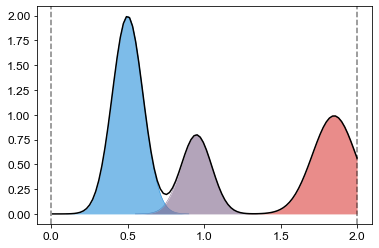

In [942]:
fig, ax = plt.subplots()

ax.plot(x, true, c = 'k', zorder = 1)
for idxt, param, w in zip([0,1,2], params, weights):
    xx = np.linspace(np.max([0.1, param[0]-4*np.sqrt(param[1])]), np.min([param[0]+4*np.sqrt(param[1]), 2]), 100)
    truex = multimode_dist([param], [w], bound = [0, 2], x = xx)
    plt.plot(xx, truex, alpha = 1, c = cmap(idxt/2), lw = 0.5, zorder = -1)
    ax.fill_between(xx, 0, truex, color = cmap(idxt/2), alpha = 0.6, lw = 0)
for line in [0,2]:
    ax.axvline(line, c = 'k', ls = '--', alpha = 0.5)
plt.setp(ax, xticks = np.arange(0, 2.01, 0.5))
fig.savefig('dist_alpha.svg')

In [937]:
from andi_datasets.utils_challenge import multimode_dist
bound = [-12, 3]
x = np.linspace(bound[0], bound[1], 1000)
params = [[-7, 1.5], [-3, 0.9]]
weights = [0.4, 0.6]
true = multimode_dist(params, weights, bound = bound, x = x)

-2.1010205144336442 -11.898979485566356
0.7947331922020551 -6.794733192202055


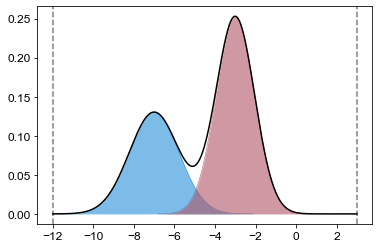

In [939]:
fig, ax = plt.subplots()

ax.plot(x, true, c = 'k', zorder = 1)
for idxt, param, w in zip([0,1,2], params, weights):
    xx = np.linspace(np.max([bound[0], param[0]-4*np.sqrt(param[1])]), np.min([param[0]+4*np.sqrt(param[1]), bound[1]]), 100)
    print(xx.max(), xx.min())
    truex = multimode_dist([param], [w], bound = bound, x = xx)
    if idxt == 1: idxt += 0.5
    plt.plot(xx, truex, alpha = 1, c = cmap(idxt/2), lw = 0.5, zorder = -1)
    ax.fill_between(xx, 0, truex, color = cmap(idxt/2), alpha = 0.6, lw = 0)
for line in bound:
    ax.axvline(line, c = 'k', ls = '--', alpha = 0.5)
# plt.setp(ax, xticks = np.arange(0, 2.01, 0.5))
fig.savefig('dist_D.svg')

# Models scheme

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from andi_datasets.models_phenom import models_phenom


In [318]:
L = 256
Ds = [[1,0], [0.01,0]]
alphas = [[1.5,0], [0.8,0]]
T = 500

## Single state

In [197]:
traj_s, label_s = models_phenom().single_state(N = 1, T = 250, L = L, Ds = 1, alphas=1.5)
traj_s, label_s = traj_s.squeeze(1), label_s.squeeze(1)

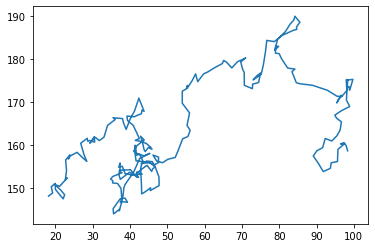

In [198]:
plt.plot(traj_s[:,0], traj_s[:,1])

## Multi-state

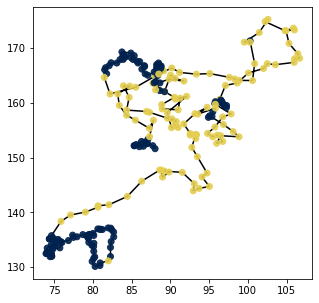

In [351]:
Ds = [[1,0], [0.1,0]]
alphas = [[1.5,0], [1.5,0]]

trajs, labels = models_phenom().multi_state(N = 5, T = 250, L = L, Ds = Ds, alphas=alphas)
selected = 1
traj_ms = trajs[:,selected,:].copy()
lab_ms = labels[:,selected,:].copy()
fig, ax = plt.subplots(figsize = (5,5))
ax.scatter(traj_ms[:,0], traj_ms[:,1], c = plt.cm.cividis(np.round(lab_ms[:,1])-0.1), alpha = 0.9)
ax.plot(traj_ms[:,0], traj_ms[:,1], c = 'k', zorder = -2)
# fig.savefig('multi 2d traj.svg')

## Dimerization

In [863]:
T_shared = 100; T=250
T_in = 80; T_end = T-T_shared-T_in
shared_seg = models_phenom().single_state(N = 1, T = T_shared, alphas=1, Ds = 0.01)[0].squeeze(1)
i1, e1 = [models_phenom().single_state(N = 1, T = T_in, alphas=1)[0].squeeze(1), 
          models_phenom().single_state(N = 1, T = T_end, alphas=1)[0].squeeze(1)]
i2, e2 = [models_phenom().single_state(N = 1, T = T_in, alphas=1)[0].squeeze(1), 
          models_phenom().single_state(N = 1, T = T_end, alphas=1)[0].squeeze(1)]
label = np.ones(T_shared+T_in+T_end)
label[T_in:T_in+T_shared] = 0

traj1 = np.vstack((np.vstack((i1-i1[-1,:]+shared_seg[0,:], shared_seg)), e1-e1[0,:]+shared_seg[-1,:]))
traj2 = np.vstack((np.vstack((i2-i2[-1,:]+shared_seg[0,:], shared_seg)), e2-e2[0,:]+shared_seg[-1,:]))

In [866]:
models_phenom().single_state(N = 1, T = T_shared, alphas=1, Ds = 0.01)[0].shape

(100, 1, 2)

In [891]:
traj = [0]; cps = []
for idx, D in enumerate([1, 0.01, 1, 0.01, 1]):
    
    cps.append(int(np.random.randint(low = 200, high = 300, size = 1)))
    seg = models_phenom().single_state(N = 1, T = cps[-1], alphas=1, Ds = D)[0][:,0,0]
    traj += (seg-seg[0]+traj[-1]).tolist()
    

[Text(0.5, 0, 'Time'), Text(0, 0.5, 'Position')]

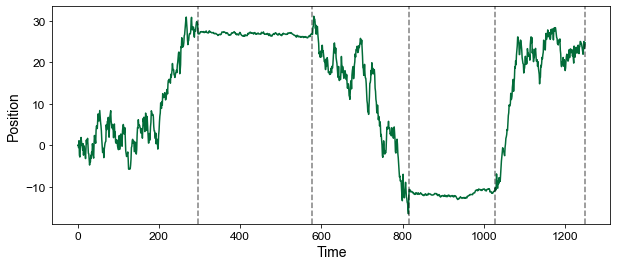

In [906]:
fig, ax = plt.subplots(figsize = (10, 4))
ax.plot(traj, c = plt.cm.RdYlGn(0.99))
for cp in np.cumsum(cps):
    ax.axvline(cp, c = 'k', ls = '--', alpha = 0.5)
plt.setp(ax, xlabel = 'Time', ylabel = 'Position')

In [574]:
traj_d1 = traj1
traj_d2 = traj2
label_d = np.ones(T_shared+T_in+T_end)
label_d[T_in:T_in+T_shared] = 0

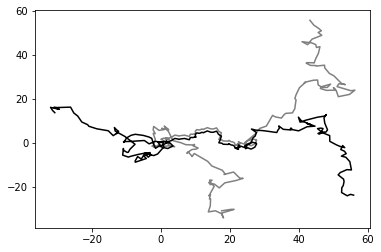

In [415]:
plt.plot(traj1[:,0], traj1[:,1], c = 'k')
#plt.scatter(traj1[:,0], traj1[:,1], c = plt.cm.cividis(label-0.1), alpha = 0.9)

plt.plot(traj2[:,0], traj2[:,1]+1.5, c = 'gray', zorder = -1)
#plt.scatter(traj2[:,0], traj2[:,1], c = 'gray')


#plt.plot(traj1[:,1])
#plt.scatter(np.arange(traj1.shape[0]), traj1[:,1], c = plt.cm.cividis(label))
#plt.plot(traj2[:,1], c = 'gray')

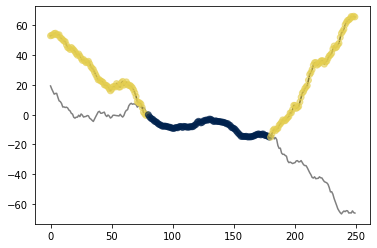

In [340]:
traj_d1, traj_d2, label_d = traj1, traj2, label
plt.plot(traj1[:,1], c = 'k', zorder = -1)
plt.scatter(np.arange(traj1.shape[0]), traj1[:,1], c = plt.cm.cividis(label-0.1), alpha = 0.6)
plt.plot(traj2[:,1], c = 'gray', zorder = -2)


## confinement

In [535]:
Nc = 15; r = 1; L = 20
Ds = [[1,0], [1,0.1]]
r , L, Nc = (15, 256, 60)
comp_center = models_phenom._distribute_circular_compartments(Nc = Nc, r = r, L = L)
trajs, labels = models_phenom().confinement(N = 2, T = 250, L = L, comp_center = comp_center, trans = 0.2, Ds = Ds, r = r)


c:\users\gorka\github\andi_datasets\andi_datasets\models_phenom.py:609: UserWarning: Could accomodate 40 circles of the 60 requested. Increase size of environment or decrease radius of compartments.
  warnings.warn(warn_str)


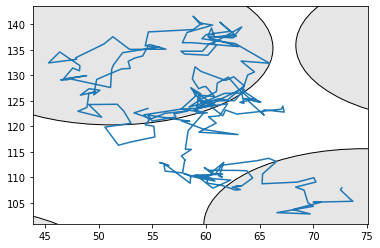

In [222]:
trajs, labels = models_phenom().confinement(N = 2, T = 250, L = L, comp_center = comp_center, trans = 0.2, Ds = Ds, r = r)

traj_c, labels_c = trajs[:,1,:].copy(), labels[:,1,:].copy()
fig, ax = plt.subplots()
ax.plot(trajs[:,1,0], trajs[:,1,1])
lims = ax.get_xlim(), ax.get_ylim()
for c in comp_center:
    circle = plt.Circle((c[0], c[1]), r, lw = 1, facecolor = np.ones(3)*0.9, edgecolor = 'k', zorder = -2, alpha = 1)
    ax.add_patch(circle) 

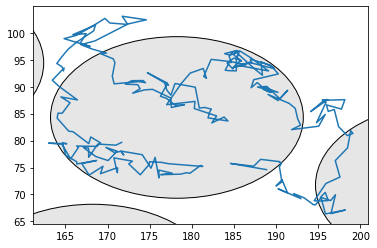

In [550]:
r , L, Nc = (15, 256, 60)
trajs, labels = models_phenom().confinement(N = 2, T = 250, L = L, comp_center = comp_center, trans = 0.2, Ds = Ds, r = r)

traj_c, labels_c = trajs[:,1,:].copy(), labels[:,1,:].copy()
fig, ax = plt.subplots()
ax.plot(trajs[:,1,0], trajs[:,1,1])
lims = ax.get_xlim(), ax.get_ylim()
for c in comp_center:
    circle = plt.Circle((c[0], c[1]), r, lw = 1, facecolor = np.ones(3)*0.9, edgecolor = 'k', zorder = -2, alpha = 1)
    ax.add_patch(circle) 

## Trapping

In [439]:
trajs[:,0,:].shape

(250, 2)

In [513]:
Pb = 1; Pu = 0.1; r = 2; Nt = 500
traps_pos = np.random.rand(Nt, 2)*L 

trajs, labels = models_phenom().immobile_traps(N = 5, T = 250, L = L, r = r, Pu = Pu, # Unbinding probability
                            Pb = Pb, # Binding probability
                            Ds = 1, # Diffusion coefficients of moving state
                            alphas = 1.5, # Anomalous exponents of moving state
                            Nt = Nt,
                            traps_pos = traps_pos
                            )




*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


(67.22077715332449, 114.80043825511096)

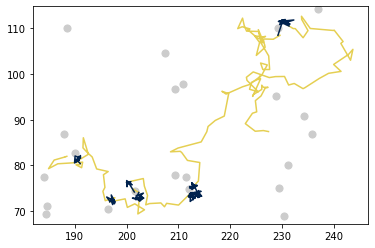

In [523]:
idx = 1
traj_t, label_t = trajs[:,idx,:]+np.random.randn(250, 2)*0.5, labels[:,idx,:]

fig, ax = plt.subplots()
plot_color_lines(traj_t, label = label_t[:,-1], ax = ax, cmp = newcmp)
# ax.scatter(traj_t[:,0], traj_t[:,1], color = plt.cm.cividis(label_t[:,0]-0.1), alpha = 0.5)
lims = ax.get_xlim(), ax.get_ylim()
ax.scatter(traps_pos[:,0], traps_pos[:,1], c = np.ones(3)*0.8, s = np.pi*4**2, zorder = -3)
ax.set_xlim(lims[0])
ax.set_ylim(lims[1])

## All together

In [577]:
Ts = np.stack((traj_s, traj_ms, traj_d1, traj_d2, traj_c, traj_t))
Ls = np.stack((label_s[:,1], lab_ms[:,1], label_d, labels_c[:,1], label_t[:,1]))
np.save('nice_trajs.npy', Ts)
np.save('nice_labs.npy', Ls)

In [581]:
from matplotlib.colors import ListedColormap
from PIL import ImageColor
rgb1 = np.array(ImageColor.getcolor("#2790DB", "RGB"))/250
rgb2 = np.array(ImageColor.getcolor("#DB403D", "RGB"))/250

# cmap = plt.cm.get_cmap('cividis', 256)
# newcolors = np.vstack((cmap(0), cmap(0.9)))

newcolors = np.vstack((rgb1, rgb2))
newcmp = ListedColormap(newcolors)

titles = ['Single-state', 'Multi-state', 'Dimerization', 'Transient confinement', 'Quenched-trap']

import matplotlib
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 12}
matplotlib.rc('font', **font)
plt.rcParams.update({'font.size': 12})
plt.rc('axes', labelsize=14) 

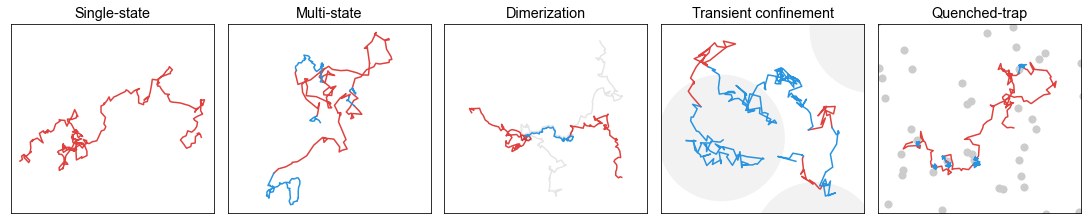

In [838]:
size_fig = 3
fig, ax = plt.subplots(1, 5, figsize = (5*size_fig, size_fig), constrained_layout = True)

alpha_scatter = 1
size_scatter = 3

# Single state
plot_color_lines(traj_s, label = 1, ax = ax[0], cmp = newcmp)

# Multi state
plot_color_lines(traj_ms, label = lab_ms[:,1], ax = ax[1], cmp = newcmp)

# Dimerization
plot_color_lines(traj_d1, label = label_d, ax = ax[2], cmp = newcmp)
ax[2].plot(traj_d2[:,0], traj_d2[:,1]+1, c = 'k', zorder = -1, alpha = 0.1)

# Confinement
plot_color_lines(traj_c, label = labels_c[:,-1]-1, ax = ax[3], cmp = newcmp)
lims = ax[3].get_xlim(), ax[3].get_ylim()
for c in comp_center:
    circle = plt.Circle((c[0], c[1]), r, lw = 0, facecolor = np.ones(3)*0.95, edgecolor = 'k', zorder = -2, alpha = 1)
    ax[3].add_patch(circle) 
    
# Trapping
plot_color_lines(traj_t, label = label_t[:,-1], ax = ax[4], cmp = newcmp)
lims = ax[4].get_xlim(), ax[4].get_ylim()
ax[4].scatter(traps_pos[:,0], traps_pos[:,1], color = np.ones(3)*0.8, s = np.pi*4**2, zorder = -3)
ax[4].set_xlim(lims[0])
ax[4].set_ylim(lims[1])

plt.setp(ax, xticks = [], yticks = [])
for a, tit in zip(ax, titles):
    a.set_aspect('equal', adjustable='datalim')
    a.set_title(tit)
    
    
    
    
fig.savefig('models_scheme_square.svg')

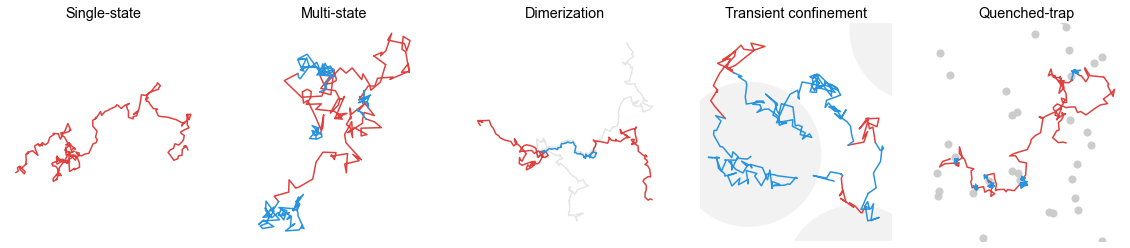

In [841]:
size_fig = 4
fig, ax = plt.subplots(1, 5, figsize = (5*size_fig, size_fig))

alpha_scatter = 1
size_scatter = 3

# Single state
plot_color_lines(traj_s, label = 1, ax = ax[0], cmp = newcmp)

# Multi state
plot_color_lines(traj_ms+np.random.randn(traj_ms.shape[0], traj_ms.shape[1]), label = lab_ms[:,1], ax = ax[1], cmp = newcmp)

# Dimerization
plot_color_lines(traj_d1, label = label_d, ax = ax[2], cmp = newcmp)
ax[2].plot(traj_d2[:,0], traj_d2[:,1]+1, c = 'k', zorder = -1, alpha = 0.1)

# Confinement
plot_color_lines(traj_c, label = labels_c[:,-1]-1, ax = ax[3], cmp = newcmp)
lims = ax[3].get_xlim(), ax[3].get_ylim()
for c in comp_center:
    circle = plt.Circle((c[0], c[1]), r, lw = 0, facecolor = np.ones(3)*0.95, edgecolor = 'k', zorder = -2, alpha = 1)
    ax[3].add_patch(circle) 
    
# Trapping
plot_color_lines(traj_t, label = label_t[:,-1], ax = ax[4], cmp = newcmp)
lims = ax[4].get_xlim(), ax[4].get_ylim()
ax[4].scatter(traps_pos[:,0], traps_pos[:,1], color = np.ones(3)*0.8, s = np.pi*4**2, zorder = -3)
ax[4].set_xlim(lims[0])
ax[4].set_ylim(lims[1])

plt.setp(ax, xticks = [], yticks = [])
for a, tit in zip(ax, titles):
    a.set_aspect('equal', adjustable='datalim')
    a.set_title(tit)
    a.set_axis_off()
    
    
    
    
# fig.savefig('models_scheme.svg')

In [571]:
from andi_datasets.datasets_phenom import datasets_phenom
datasets_phenom().avail_models_name


['single_state',
 'multi_state',
 'immobile_traps',
 'dimerization',
 'confinement']

In [842]:
label_d

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

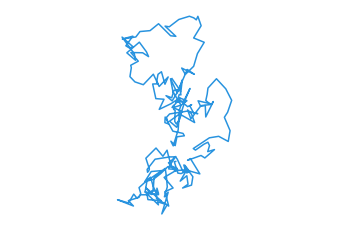

In [848]:
fig, ax = plt.subplots()
plot_color_lines(np.random.randn(250,2).cumsum(0), label = 0, ax = ax, cmp = newcmp)
ax.set_axis_off()
ax.set_aspect('equal', adjustable='datalim')

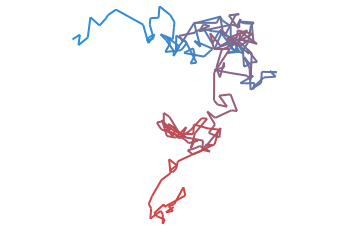

In [858]:
from matplotlib.collections import LineCollection

x    = np.random.randn(250).cumsum()
y    = np.random.randn(250).cumsum()
cols = np.linspace(0,1,len(x))

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

fig, ax = plt.subplots()
lc = LineCollection(segments, cmap=cmap)
lc.set_array(cols)
lc.set_linewidth(2)
line = ax.add_collection(lc)
# fig.colorbar(line,ax=ax)
plt.setp(ax, xlim = (x.min(), x.max()), ylim = (y.min(), y.max()))
ax.set_aspect('equal', adjustable='datalim')
ax.set_axis_off()

In [393]:
CPs[:-1]

[0, 11, 47, 49, 50, 94, 107, 108, 129, 140, 153, 157, 189, 234]

[]

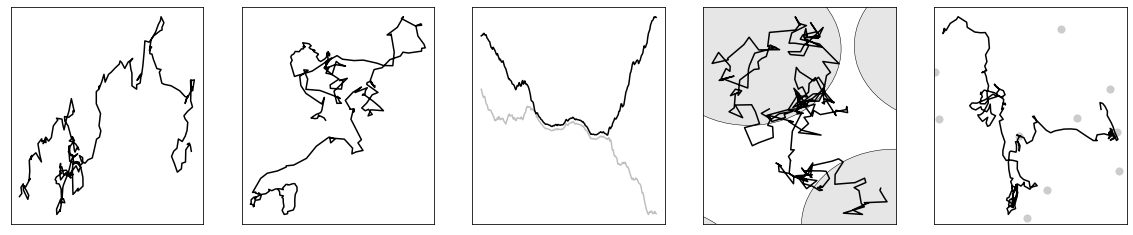

In [369]:
size_fig = 4
fig, ax = plt.subplots(1, 5, figsize = (5*size_fig, 1*size_fig))

alpha_scatter = 1
size_scatter = 3

# Single state
#ax[0].scatter(traj_s[:,0], traj_s[:,1], c = newcmp(np.round(label_s[:,1])), alpha = alpha_scatter, s = size_scatter)
ax[0].plot(traj_s[:,0], traj_s[:,1], c = 'k', zorder = -2)

# Multi state
#ax[1].scatter(traj_ms[:,0], traj_ms[:,1], c = newcmp(np.round(lab_ms[:,1])), alpha = alpha_scatter, s = size_scatter)
ax[1].plot(traj_ms[:,0], traj_ms[:,1], c = 'k', zorder = -2)

# Dimerization
#ax[2].scatter(np.arange(traj_d1.shape[0]), traj1[:,1], c = newcmp(label_d), alpha = alpha_scatter, s = size_scatter)
ax[2].plot(traj_d1[:,1]+3, c = 'k', zorder = -1)
ax[2].plot(traj_d2[:,1], c = 'gray', zorder = -2, alpha = 0.5)

# Confinement
#ax[3].scatter(traj_c[:,0], traj_c[:,1], c = newcmp(labels_c[:,-1]-1), alpha = alpha_scatter, s = size_scatter)
ax[3].plot(traj_c[:,0], traj_c[:,1], c = 'k', zorder = -2)
lims = ax[3].get_xlim(), ax[3].get_ylim()
for c in comp_center:
    circle = plt.Circle((c[0], c[1]), r, lw = 0.5, facecolor = np.ones(3)*0.9, edgecolor = 'k', zorder = -2, alpha = 1)
    ax[3].add_patch(circle) 
    
# Trapping
#ax[4].scatter(traj_t[:,0], traj_t[:,1], color = newcmp(label_t[:,1]), alpha = alpha_scatter, s = size_scatter)
ax[4].plot(traj_t[:,0], traj_t[:,1], zorder = -1, c = 'k')
lims = ax[4].get_xlim(), ax[4].get_ylim()
ax[4].scatter(traps_pos[:,0], traps_pos[:,1], color = np.ones(3)*0.8, s = np.pi*4**2, zorder = -3)
ax[4].set_xlim(lims[0])
ax[4].set_ylim(lims[1])

plt.setp(ax, xticks = [], yticks = [])